## Importação e instalação dos pacotes no Python

In [2]:
!pip install pandas
!pip install numpy
!pip install -U seaborn
!pip install matplotlib
!pip install plotly
!pip install scipy
!pip install statsmodels
!pip install scikit-learn
!pip install statstests


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import pandas as pd # manipulação de dados em formato de dataframe
import numpy as np # operações matemáticas
import seaborn as sns # visualização gráfica
import matplotlib.pyplot as plt # visualização gráfica
from math import exp, factorial # funções matemáticas 'exp' e 'factorial'
import statsmodels.api as sm # estimação de modelos
import statsmodels.formula.api as smf # estimação de modelos de contagem
from statsmodels.discrete.count_model import ZeroInflatedNegativeBinomialP,ZeroInflatedPoisson
# pacote acima para a estimação dos modelos ZINB e ZIP, respectivamente
from statsmodels.discrete.discrete_model import NegativeBinomial, Poisson
# pacote anterior para a realização do teste de Vuong
from scipy import stats # estatística chi2
from statsmodels.iolib.summary2 import summary_col # comparação entre modelos

import warnings
warnings.filterwarnings('ignore')

# Supervised Machine Learning - Modelos para Dados de Contagem

Nessa unidade, utilizaremos modelos para estimar contagens de dados. O output serão valores quantitativos inteiros e não negativos. De acordo com a tabela abaixo, serão utilizadas as funções de densidade de probabilidade Poisson e Binomial Negativa.

Seguem alguns modelos de regressão:


\begin{array}{|c|c|c|}
\hline
\textbf{Tipo de Modelo de Regressão} & \textbf{Características da Variável Dependente} & \textbf{Distribuição} \\
\hline
\text{Regressão Linear} & \text{Quantitativa, contínua e não restrita} & \text{Normal} \\
\hline
\text{Regressão Logística Binária} & \text{Qualitativa, binária (0 ou 1)} & \text{Bernoulli} \\
\hline
\text{Regressão Logística Multinomial} & \text{Qualitativa, multicategórica} & \text{Multinomial} \\
\hline
\text{Regressão Poisson} & \text{Quantitativa, contagem (inteiros não negativos)} & \text{Poisson} \\
\hline
\text{Regressão Log-Linear} & \text{Quantitativa, contagem de eventos em categorias} & \text{Poisson} \\
\hline
\text{Regressão Gamma} & \text{Quantitativa, contínua, positiva e assimétrica} & \text{Gamma} \\
\hline
\text{Regressão Binomial Negativa} & \text{Quantitativa, contagem com sobredispersão} & \text{Binomial Negativa} \\
\hline
\text{Regressão com Transformação de Box-Cox} & \text{Quantitativa, contínua transformada} & \text{Normal (após transformação)} \\
\hline
\end{array}

**Nota**: As característica da variável dependente, refere-se à variável dependente na base de dados, não é o output do modelo. Por exemplo, na Regressão Logística Binária a variável dependente na base de dados é binária, mas o output do modelo é uma probabilidade do evento binário acontecer.

Os modelos de regressão de Poisson e Binomial Negativo fazem parte do que é conhecido por modelos de regressão para dados de contagem, e têm por objetivo analisar o comportamento, em função de variáveis preditoras, de determinada variável dependente que se apresenta na forma quantitativa.

Num dado de contagem a variável dependente possui 4 características:

1. São dados quantitativos
2. Inteiros
3. Não negativos
4. Determinados por uma exposição: unidade temporal, espacial, social, etc. (*e.g.* Quantidade de filhos por família, carros passando por unidade de tempo, cupinzeiros por km).

## *F.d.p.* Binomial Negativa x Poisson

Utilizamos a função Poisson, quando lidamos com problemas de contagem onde o número de tentativas não é constante, ou quando o número de eventos pode ser infinito.

### Distribuição Poisson

A probabilidade da ocorrência de $m$ contagens em uma determinada exposição na distribuição de Poisson é dada por:

\begin{equation}
p(Y_i = m) = \dfrac{e^{\lambda_i}.\lambda^{m}_i}{m!}
\end{equation}

Onde:

$\lambda$ é o número esperado de ocorrências ou a taxa média estimada de incidência do fenômeno para dada exposição \

Nessa distribuição o valor esperado $\lambda$ é igual à variância:

\begin{equation}
Var(X) = \lambda
\end{equation}

Como $Var(X) = \sigma^2$, temos que o desvio padrão $\sigma$ é dado por:

\begin{equation}
\sigma = \sqrt{\lambda}
\end{equation}

#### O modelo de Poisson

\begin{equation}
ln(\hat{Y}_i) = ln(\lambda_{\text{Poisson}_i}) = \alpha + \beta_1.X_{1i} + \dots + \beta_n.X_{ni}
\end{equation}

#### Estudo no Python

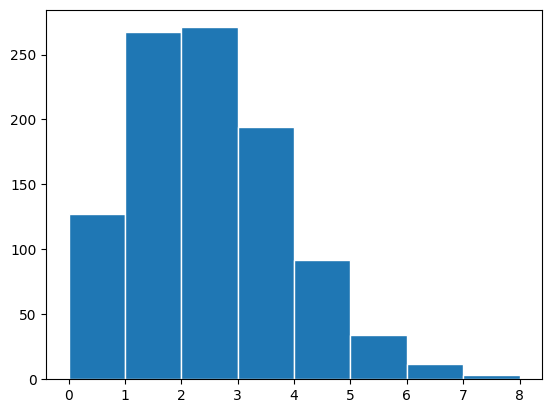

In [2]:
# Histograma da distribuição Poisson

pois = np.random.poisson(lam=2, size=1000)
plt.hist(pois, bins=8, edgecolor='white')
plt.show()

In [3]:
#Estabelecendo uma função da distribuição Poisson para determinados valores
#de lambda
def poisson_lambda(lmbda,m):
    return (exp(-lmbda) * lmbda ** m) / factorial(m)

Aqui vamos comparar a função de poisson com diferentes valores médios:

In [4]:
#In[Poisson 1]: Plotagem da função definida para diferentes valores de lambda

m = np.arange(0,21)

lmbda_1 = []
lmbda_2 = []
lmbda_4 = []

for item in m:
    # Estabelecendo a distribuição com lambda = 1
    lmbda_1.append(poisson_lambda(1,item))
    # Estabelecendo a distribuição com lambda = 2
    lmbda_2.append(poisson_lambda(2,item))
    # Estabelecendo a distribuição com lambda = 4
    lmbda_4.append(poisson_lambda(4,item))

# Criando um dataframe com m variando de 0 a 20 e diferentes valores de lambda
df_lambda = pd.DataFrame({'m':m,
                          'lambda_1':lmbda_1,
                          'lambda_2':lmbda_2,
                          'lambda_4':lmbda_4})
df_lambda

,m,lambda_1,lambda_2,lambda_4
0,0,3.678794e-01,1.353353e-01,0.018316
1,1,3.678794e-01,2.706706e-01,0.073263
2,2,1.839397e-01,2.706706e-01,0.146525
3,3,6.131324e-02,1.804470e-01,0.195367
4,4,1.532831e-02,9.022352e-02,0.195367
5,5,3.065662e-03,3.608941e-02,0.156293
6,6,5.109437e-04,1.202980e-02,0.104196
7,7,7.299195e-05,3.437087e-03,0.059540
8,8,9.123994e-06,8.592716e-04,0.029770
9,9,1.013777e-06,1.909493e-04,0.013231


<function matplotlib.pyplot.show(close=None, block=None)>

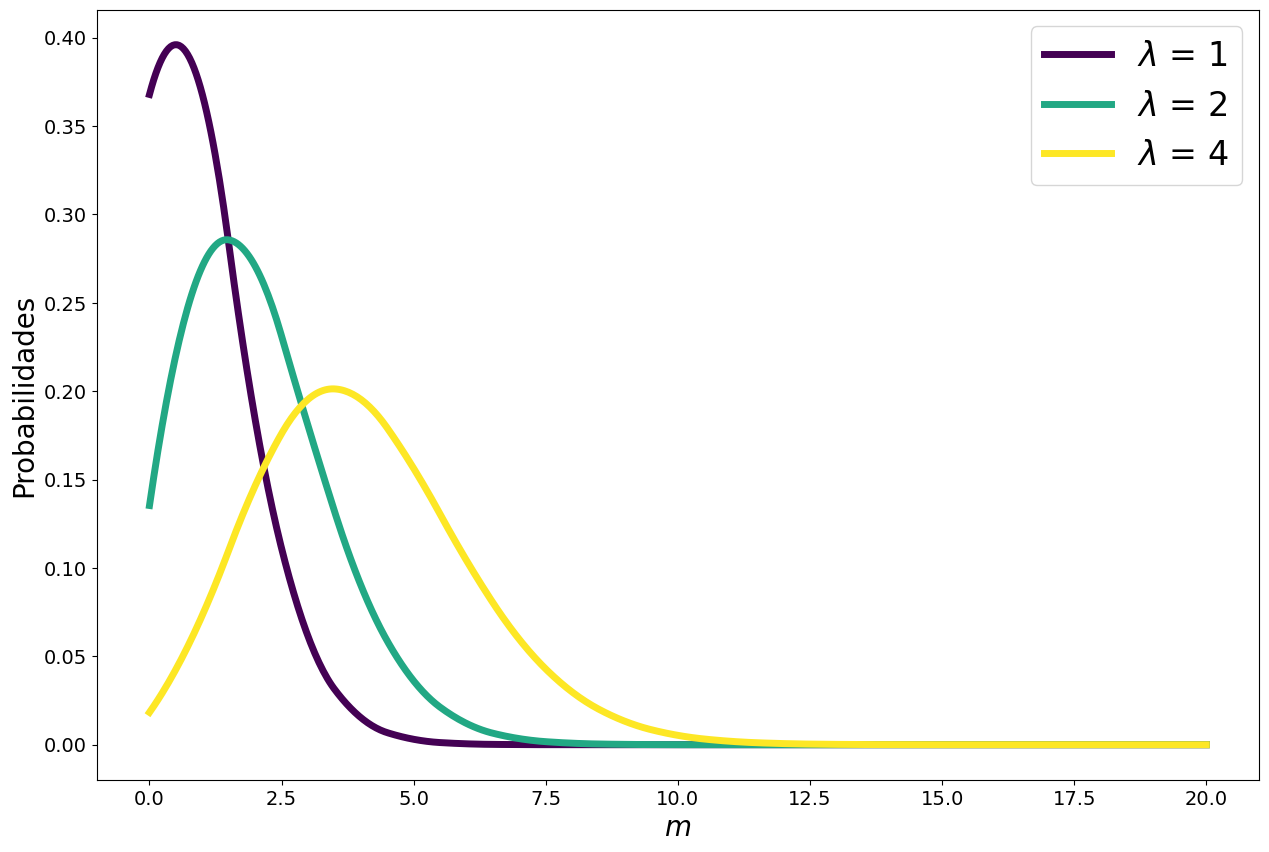

In [5]:
# In[Poisson 2]: Plotagem propriamente dita

from scipy.interpolate import interp1d

def smooth_line_plot(x,y):
    x_new = np.linspace(x.min(), x.max(),500)
    f = interp1d(x, y, kind='quadratic')
    y_smooth=f(x_new)
    return x_new, y_smooth

x_new, lambda_1 = smooth_line_plot(df_lambda.m, df_lambda.lambda_1)
x_new, lambda_2 = smooth_line_plot(df_lambda.m, df_lambda.lambda_2)
x_new, lambda_4 = smooth_line_plot(df_lambda.m, df_lambda.lambda_4)

plt.figure(figsize=(15,10))
plt.plot(x_new, lambda_1, linewidth=5, color='#440154FF')
plt.plot(x_new, lambda_2, linewidth=5, color='#22A884FF')
plt.plot(x_new, lambda_4, linewidth=5, color='#FDE725FF')
plt.xlabel('m', fontsize=20, style='italic')
plt.ylabel('Probabilidades', fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend([r'$\lambda$ = 1',r'$\lambda$ = 2',r'$\lambda$ = 4'], fontsize=24)
plt.show

### Distribuição Biomial Negativa (Poisson-Gama)

Nessa distribuição a média é igual ao valor esperado:

\begin{equation}
E(Y) = \lambda_{bneg}
\end{equation}

Já a variância é dada por: 

\begin{equation}
Var(Y) = \lambda_{bneg} + \phi.(\lambda_{bneg})^2
\end{equation}

Onde $\phi = \dfrac{1}{\theta}$ é o parâmetro de dispersão

Se $\phi$ é estatisticamente diferente zero, então estimamos um modelo com superdispersão com cauda longa. Caso seja igual a zero, então estamos lidando com a função Poisson.

O modelo da Distribuição Binomial Negativa é dada por:

\begin{equation}
FALTA TERMINAR
\end{equation}

In [28]:
# In[BINOMIAL NEGATIVA]:
##############################################################################
#                     A DISTRIBUIÇÃO BINOMIAL NEGATIVA                       #
##############################################################################

# Estabelecendo uma função da distribuição binomial negativa para determinados
#valores de theta e delta
# theta: parâmetro de forma da distribuição Poisson-Gama (binomial negativa)
# delta: parâmetro de taxa de decaimento da distribuição Poisson-Gama

def bneg(theta, delta, m):
    return ((delta ** theta) * (m ** (theta - 1)) * (exp(-m * delta))) / factorial(theta - 1)

In [29]:
# In[Binomial Negativa 1]: Plotagem das funções estabelecidas para diferentes valores de
#theta e delta

m = np.arange(1,21)

bneg_theta2_delta2 = []
bneg_theta3_delta1 = []
bneg_theta3_delta05 = []

for item in m:
    # Estabelecendo a distribuição binomial negativa com theta=2 e delta=2
    bneg_theta2_delta2.append(bneg(2,2,item))
    # Estabelecendo a distribuição binomial negativa com theta=3 e delta=1
    bneg_theta3_delta1.append(bneg(3,1,item))
    # Estabelecendo a distribuição binomial negativa com theta=3 e delta=0.5
    bneg_theta3_delta05.append(bneg(3,0.5,item))
   
# Criando um dataframe com m variando de 1 a 20 e diferentes valores de
#theta e delta
df_bneg = pd.DataFrame({'m':m,
                        'bneg_theta2_delta2':bneg_theta2_delta2,
                        'bneg_theta3_delta1':bneg_theta3_delta1,
                        'bneg_theta3_delta05':bneg_theta3_delta05})

df_bneg

,m,bneg_theta2_delta2,bneg_theta3_delta1,bneg_theta3_delta05
0,1,5.413411e-01,1.839397e-01,0.037908
1,2,1.465251e-01,2.706706e-01,0.091970
2,3,2.974503e-02,2.240418e-01,0.125511
3,4,5.367402e-03,1.465251e-01,0.135335
4,5,9.079986e-04,8.422434e-02,0.128258
5,6,1.474611e-04,4.461754e-02,0.112021
6,7,2.328280e-05,2.234111e-02,0.092479
7,8,3.601126e-06,1.073480e-02,0.073263
8,9,5.482793e-07,4.998097e-03,0.056239
9,10,8.244614e-08,2.269996e-03,0.042112


<function matplotlib.pyplot.show(close=None, block=None)>

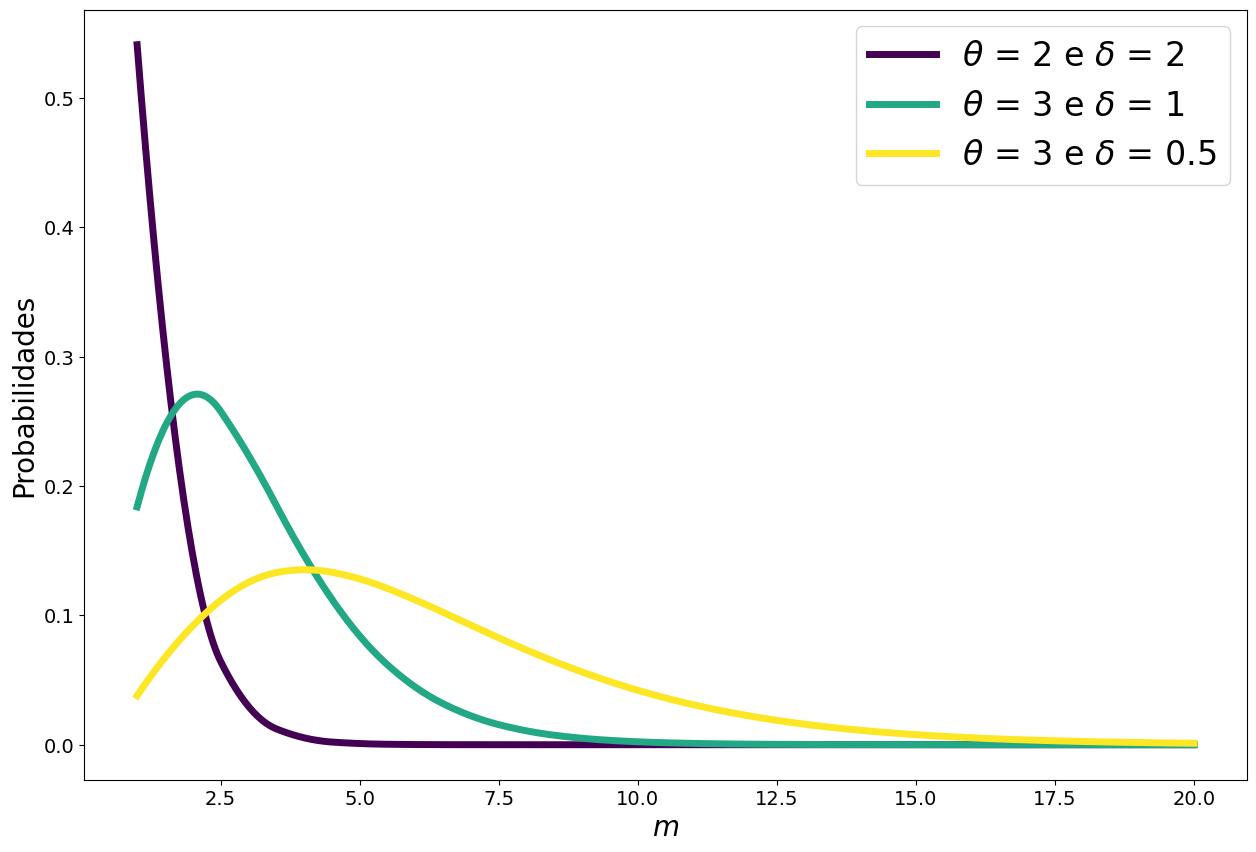

In [30]:
# In[Binomial Negativa 2]: Plotagem propriamente dita

def smooth_line_plot(x,y):
    x_new = np.linspace(x.min(), x.max(),500)
    f = interp1d(x, y, kind='quadratic')
    y_smooth=f(x_new)
    return x_new, y_smooth

x_new, bneg_theta2_delta2 = smooth_line_plot(df_bneg.m,
                                             df_bneg.bneg_theta2_delta2)
x_new, bneg_theta3_delta1 = smooth_line_plot(df_bneg.m,
                                             df_bneg.bneg_theta3_delta1)
x_new, bneg_theta3_delta05 = smooth_line_plot(df_bneg.m,
                                              df_bneg.bneg_theta3_delta05)

plt.figure(figsize=(15,10))
plt.plot(x_new,bneg_theta2_delta2, linewidth=5, color='#440154FF')
plt.plot(x_new,bneg_theta3_delta1, linewidth=5, color='#22A884FF')
plt.plot(x_new,bneg_theta3_delta05, linewidth=5, color='#FDE725FF')
plt.xlabel('m', fontsize=20, style='italic')
plt.ylabel('Probabilidades', fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend([r'$\theta$ = 2 e $\delta$ = 2',
            r'$\theta$ = 3 e $\delta$ = 1',
            r'$\theta$ = 3 e $\delta$ = 0.5'],
           fontsize=24)
plt.show

### Distribuição Zero-Inflated Poisson

A característica principal desse modelo é a grande quantidade de contagens iguais à zeros. É um modelo muito útil para modelar casos de crimes violentos, doenças raras, ou outros eventos que são raros de acontecer. É uma combinação entre modelos para dados de contagem e um modelo para dados binários, já que são utilizados para investigar as razões que levam a determinada quantidade de contagens de um fenômeno.

Para investigar se o modelo tem quantidade excessiva de zeros, é utilizado o **Teste de Vuong**. Para modelar um dataframe com distribuição zero-inflated utilizamos a função Poisson Gama.

O modelo inflacionado de zeros é definido como

\begin{cases}
p(Y_i=0) =p_\text{logit i} + (1-p_\text{logit i}).e^{-\lambda}\\
p(Y_i = m)=(1-p_\text{logit i}).\dfrac{e^{-\lambda}.\lambda}{m!}, & m=1,2,\dots
\end{cases}

Onde:

$p_\text{logit i} = \dfrac{1}{1+e^{-(\gamma + \delta_1.W_{1i} + \delta_2.W_{2i}+\dots+\delta_q.W_{qi})}}$\
$\lambda_{\text{poisson i}} = e^(\alpha + \beta_{1i}.X_{1i} + \beta_{2i}.X_{2i} + \dots + \beta_{ki}.X_{ki})$

O modelo prevê a probabilidade de **ocorrer nenhum evento** em $p(Y_i = 0).$

<function matplotlib.pyplot.show(close=None, block=None)>

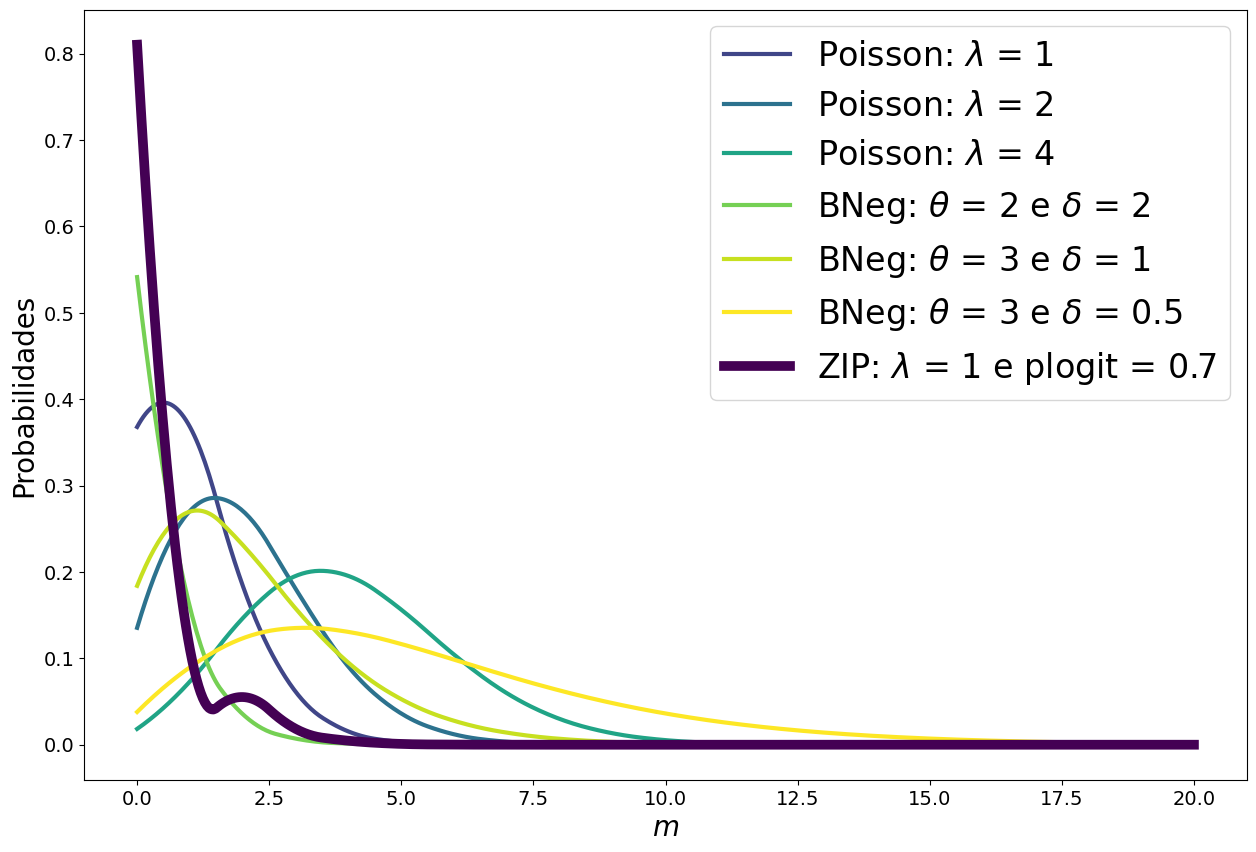

In [76]:
# In[ZIP]:
##############################################################################
#       A DISTRIBUIÇÃO ZERO-INFLATED POISSON (ZIP) - PARTE CONCEITUAL        #
##############################################################################

# LAMBERT, D. Zero-inflated Poisson regression, with an application to defects
#in manufacturing. Technometrics, v. 34, n. 1, p. 1-14, 1992.

# Exemplo de uma função da distribuição ZI Poisson, com lambda=1 e plogit=0,7
def zip_lambda1_plogit07(m):
    lmbda = 1
    plogit = 0.7
    
    if m == 0:
        return (plogit) + ((1 - plogit) * exp(-lmbda))
    else:
        return (1 - plogit) * ((exp(-lmbda) * lmbda ** m) / factorial(m))

# In[ZIP 1]: Criando um dataframe ('df_zip') com m variando de 0 a 20

m = np.arange(0,21)

zip_lambda1_plogit07 = [zip_lambda1_plogit07(i) for i in m]

df_zip = pd.DataFrame({'m':m,
                       'zip_lambda1_plogit07':zip_lambda1_plogit07})
df_zip

# In[ZIP 2]: Gráfico para comparar as distribuições Poisson, BNeg e ZIP

def smooth_line_plot(x,y):
    x_new = np.linspace(x.min(), x.max(),500)
    f = interp1d(x, y, kind='quadratic')
    y_smooth=f(x_new)
    return x_new, y_smooth

x_new, zip_lambda1_plogit07 = smooth_line_plot(df_zip.m,
                                               df_zip.zip_lambda1_plogit07)

plt.figure(figsize=(15,10))
plt.plot(x_new,lambda_1, linewidth=3, color='#404688FF')
plt.plot(x_new,lambda_2, linewidth=3, color='#2C728EFF')
plt.plot(x_new,lambda_4, linewidth=3, color='#20A486FF')
plt.plot(x_new,bneg_theta2_delta2, linewidth=3, color='#75D054FF')
plt.plot(x_new,bneg_theta3_delta1, linewidth=3, color='#C7E020FF')
plt.plot(x_new,bneg_theta3_delta05, linewidth=3, color='#FDE725FF')
plt.plot(x_new,zip_lambda1_plogit07, linewidth=7, color="#440154FF")
plt.xlabel('m', fontsize=20, style='italic')
plt.ylabel('Probabilidades', fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend([r'Poisson: $\lambda$ = 1',
            r'Poisson: $\lambda$ = 2',
            r'Poisson: $\lambda$ = 4',
            r'BNeg: $\theta$ = 2 e $\delta$ = 2',
            r'BNeg: $\theta$ = 3 e $\delta$ = 1',
            r'BNeg: $\theta$ = 3 e $\delta$ = 0.5',
            r'ZIP: $\lambda$ = 1 e plogit = 0.7'],
           fontsize=24)
plt.show

**Nota:** No modelo binomial negativa não há procedimento de stepwise.

## Distribuição Zero-Inflated tipo Binomial Negativa

A distribuição Zero-Inflated Binomial Negativa modela uma função onde há superdispersão e número elevado de não eventos.

In [85]:
# In[ZINB]:
##############################################################################
#  A DISTRIBUIÇÃO ZERO-INFLATED BINOMIAL NEGATIVA (ZINB) - PARTE CONCEITUAL  #
##############################################################################

# Exemplo de uma função da distribuição ZI Binomial Negativa, com theta = 2,
#delta = 2, plogit = 0.7 e lambda_bneg = 2
def zinb_theta2_delta2_plogit07_lambda2(m):
    lambda_bneg = 1
    plogit = 0.7
    theta = 2
    delta = 2
    if m == 0:
        return (plogit) + ((1 - plogit) *
                           (((1) / (1 + 1/theta * lambda_bneg)) ** theta))
    else:
        return (1 - plogit) * ((delta ** theta) * (m ** (theta - 1)) *
                               (exp(-m * delta))) / factorial(theta - 1)

# In[ZINB 1]: Criando um dataframe ('df_zinb') com m variando de 0 a 20

m = np.arange(0,21)

zinb_theta2_delta2_plogit07_lambda2 = [zinb_theta2_delta2_plogit07_lambda2(i)
                                       for i in m]

df_zinb = pd.DataFrame({'m':m,
                       'zinb_theta2_delta2_plogit07_lambda2':zinb_theta2_delta2_plogit07_lambda2})
df_zinb

,m,zinb_theta2_delta2_plogit07_lambda2
0,0,8.333333e-01
1,1,1.624023e-01
2,2,4.395753e-02
3,3,8.923508e-03
4,4,1.610221e-03
5,5,2.723996e-04
6,6,4.423833e-05
7,7,6.984841e-06
8,8,1.080338e-06
9,9,1.644838e-07


<function matplotlib.pyplot.show(close=None, block=None)>

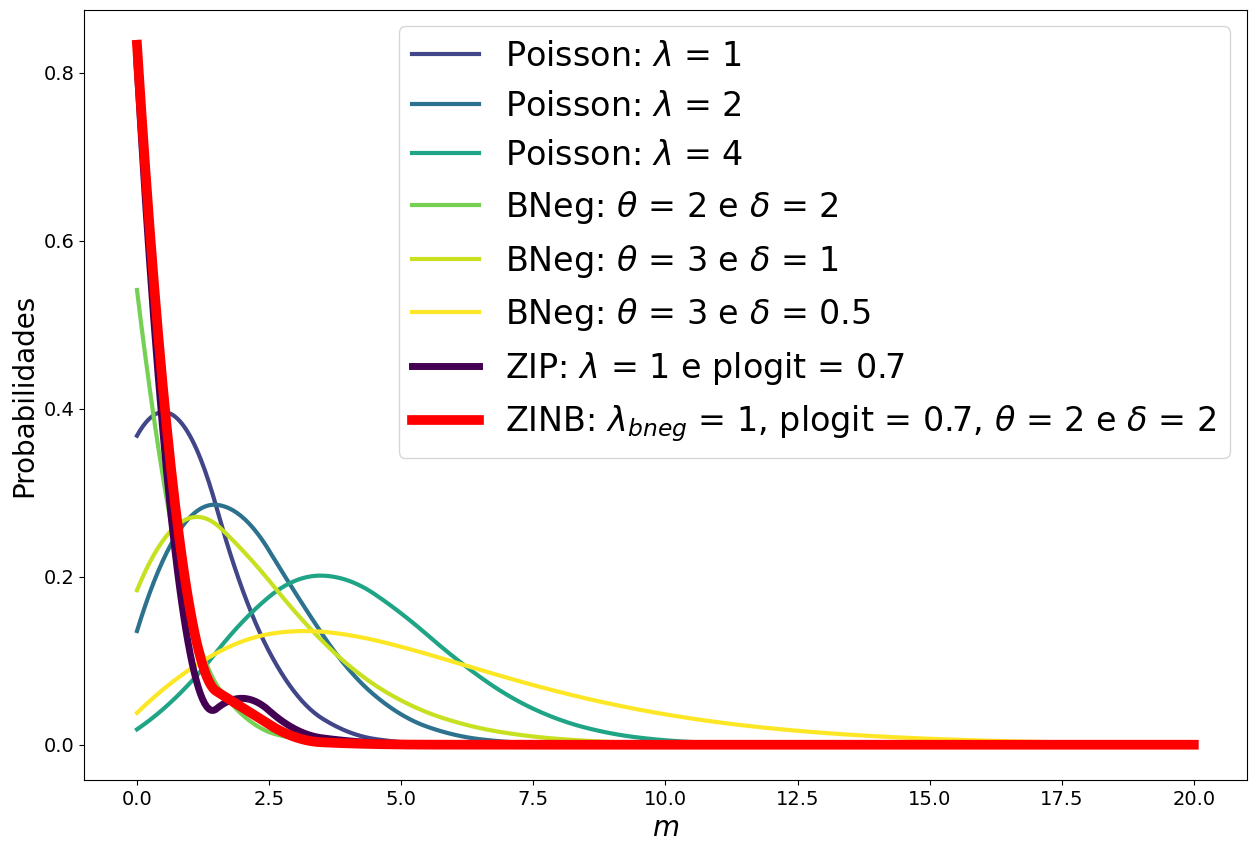

In [86]:
# In[ZINB 2]: Gráfico para comparar as distribuições Poisson, BNeg, ZIP e ZINB

def smooth_line_plot(x,y):
    x_new = np.linspace(x.min(), x.max(),500)
    f = interp1d(x, y, kind='quadratic')
    y_smooth=f(x_new)
    return x_new, y_smooth

x_new, zinb_theta2_delta2_plogit07_lambda2 = smooth_line_plot(df_zinb.m,
                                                              df_zinb.zinb_theta2_delta2_plogit07_lambda2)

plt.figure(figsize=(15,10))
plt.plot(x_new,lambda_1, linewidth=3, color='#404688FF')
plt.plot(x_new,lambda_2, linewidth=3, color='#2C728EFF')
plt.plot(x_new,lambda_4, linewidth=3, color='#20A486FF')
plt.plot(x_new,bneg_theta2_delta2, linewidth=3, color='#75D054FF')
plt.plot(x_new,bneg_theta3_delta1, linewidth=3, color='#C7E020FF')
plt.plot(x_new,bneg_theta3_delta05, linewidth=3, color='#FDE725FF')
plt.plot(x_new,zip_lambda1_plogit07, linewidth=5, color="#440154FF")
plt.plot(x_new,zinb_theta2_delta2_plogit07_lambda2, linewidth=7, color="red")
plt.xlabel('m', fontsize=20, style='italic')
plt.ylabel('Probabilidades', fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend([r'Poisson: $\lambda$ = 1',
            r'Poisson: $\lambda$ = 2',
            r'Poisson: $\lambda$ = 4',
            r'BNeg: $\theta$ = 2 e $\delta$ = 2',
            r'BNeg: $\theta$ = 3 e $\delta$ = 1',
            r'BNeg: $\theta$ = 3 e $\delta$ = 0.5',
            r'ZIP: $\lambda$ = 1 e plogit = 0.7',
            r'ZINB: $\lambda$$_{bneg}$ = 1, plogit = 0.7, $\theta$ = 2 e $\delta$ = 2'],
           fontsize=24)
plt.show

## Escolhendo o modelo

Como vimos, a escolha do modelo dependerá de algumas características da distribuição, como superdispersão ou inflação de zeros.

\begin{array}{|c|c|c|c|c|}
\hline
Verificação & \text{Poisson} & \text{Binomial Negativa} & \text{Poisson Inflacionado de Zeros (ZIP)} & \text{Binomial Negativa Inflacionada de Zeros (ZINB)} \\
\hline
\text{Superdispersão nos dados da variável dependente} & \text{não} & \text{sim} & \text{não} & \text{sim} \\
\hline
\text{Quantidade excessiva de zeros na variável dependente} & \text{não} & \text{não} & \text{sim} & \text{sim} \\
\hline
\end{array}



# Regressão para dados de contagem - Distribuição Poisson

Estudo sobre a influência de aspectos culturais na corrupção. O estudo analisa o comportamento de carros estacionados na sede da Organização das Nações Unidas, os carros pertencem aos seus membros. Até 2002, a imunidade diplomática os protegiam de receberem multas de trânsito, portanto, apenas normas culturais influenciavam no número de carros estacionados irregularmente. 

Após 2002, a legislação foi alterada e portanto os membros do corpo diplomático deveriam pagar multas e as placas poderiam ser confiscadas.

O banco de dados `corruption.csv` foi adquirido em colaboração com a prefeitura.

A ideia é construir um modelo onde:

\begin{equation}
ln(\hat{\text{violações}}_i) = \alpha + \beta_1.\text{staff}_{i} + \beta_2.\text{post}_{i} + \beta_3.\text{corruption}_{i} 
\end{equation}

## Carregando o banco de dados - `corruption.csv`

* code = Código do país
* violations = quantidade de violações por mês
* staff = Número de funcionários
* post = yes significa depois de 2002, no significa antes.
* corruption = indicador de corrupção

In [6]:
df_corruption = pd.read_csv('corruption.csv', delimiter=',')
df_corruption

,country,code,violations,staff,post,corruption
0,Angola,AGO,50,9,no,1.047506
1,Angola,AGO,1,9,yes,1.047506
2,Albania,ALB,17,3,no,0.921079
3,Albania,ALB,0,3,yes,0.921079
4,United Arab Emirates,ARE,0,3,no,-0.779468
...,...,...,...,...,...,...
293,Zaire,ZAR,0,6,yes,1.582807
294,Zambia,ZMB,37,9,no,0.562193
295,Zambia,ZMB,0,9,yes,0.562193
296,Zimbabwe,ZWE,43,14,no,0.133379


Top 5 que mais cometeram infrações, vai Brasil! (Brasil-sil-sil)

In [7]:
df_corruption.sort_values(by='violations', ascending=False)[0:5]

,country,code,violations,staff,post,corruption
80,Egypt,EGY,167,24,no,0.248812
152,Kuwait,KWT,150,9,no,-1.073995
198,Nigeria,NGA,99,25,no,1.005368
170,Morocco,MAR,69,17,no,0.100878
36,Brazil,BRA,67,33,no,-0.096330


Top 5 menos corruptos

In [8]:
df_corruption[df_corruption['post'] == 'no'].sort_values(by='corruption', ascending=True)[0:5]

,country,code,violations,staff,post,corruption
46,Switzerland,CHE,0,10,no,-2.582988
72,Denmark,DNK,0,17,no,-2.572823
90,Finland,FIN,0,18,no,-2.553532
250,Sweden,SWE,0,19,no,-2.548720
208,New Zealand,NZL,0,8,no,-2.545430


In [9]:
# Características das variáveis do dataset
df_corruption.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 298 entries, 0 to 297
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     298 non-null    object 
 1   code        298 non-null    object 
 2   violations  298 non-null    int64  
 3   staff       298 non-null    int64  
 4   post        298 non-null    object 
 5   corruption  298 non-null    float64
dtypes: float64(1), int64(2), object(3)
memory usage: 14.1+ KB


In [10]:
# Estatísticas univariadas
df_corruption.describe()

,violations,staff,corruption
count,298.000000,298.000000,298.000000
mean,6.496644,11.805369,0.013641
std,18.210377,11.079558,1.012474
min,0.000000,2.000000,-2.582988
25%,0.000000,6.000000,-0.415147
50%,0.000000,9.000000,0.326959
75%,3.000000,14.000000,0.720250
max,167.000000,86.000000,1.582807


## Tabela de frequências

In [11]:
# In[1]: Tabela de frequências da variável dependente 'violations'
# Função 'values_counts' do pacote 'pandas', sem e com o argumento
#'normalize=True', para gerar as contagens e os percentuais, respectivamente

contagem = df_corruption['violations'].value_counts(dropna=False)
percent = (df_corruption['violations'].value_counts(dropna=False, normalize=True)*100).round(2)
table = pd.concat([contagem, percent], axis=1, keys=['contagem', '%'], sort=True)
table

,contagem,%
violations,,
0,156,52.35
1,35,11.74
2,16,5.37
3,17,5.70
4,5,1.68
5,10,3.36
6,3,1.01
7,4,1.34
8,3,1.01


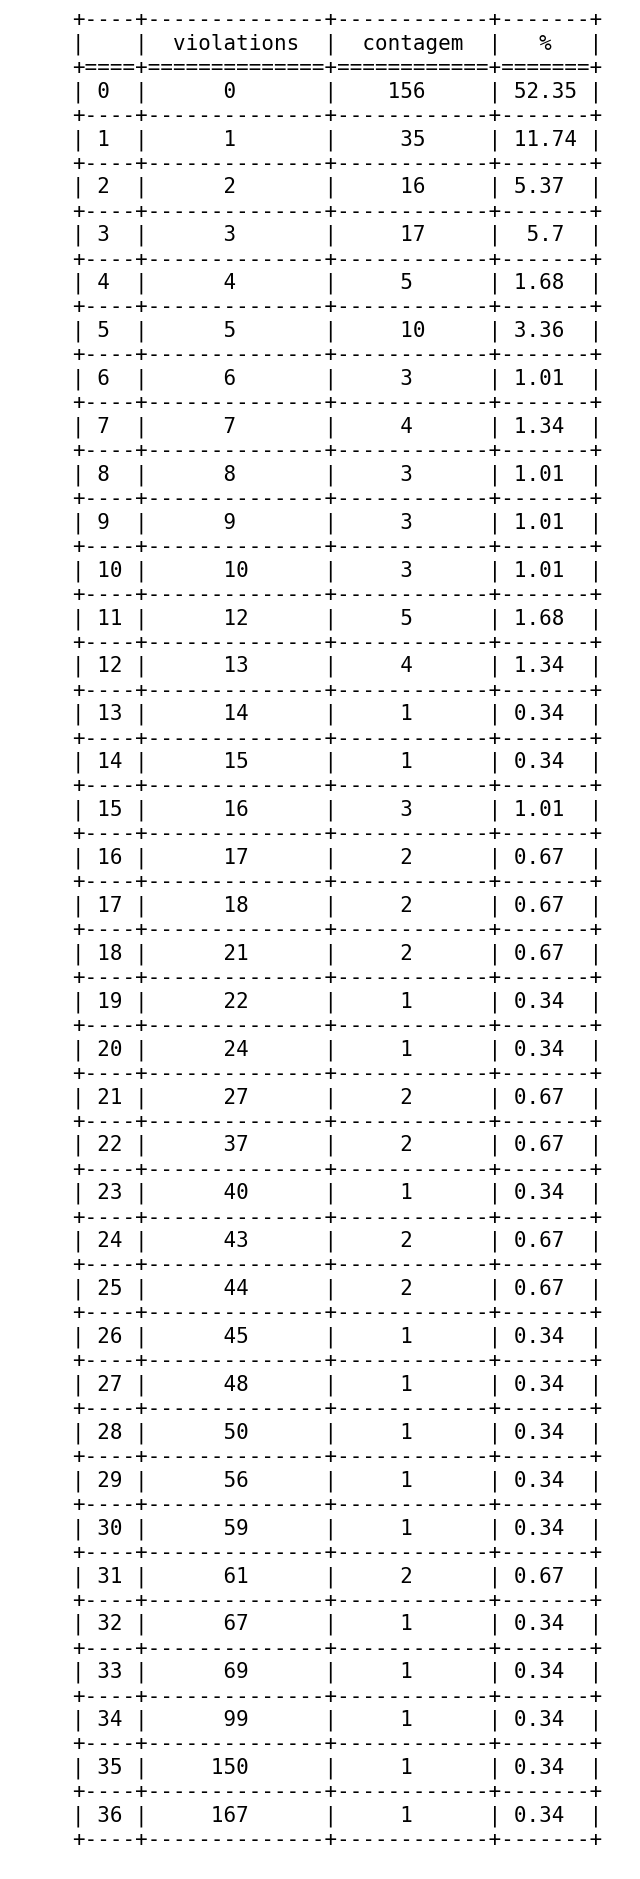

In [12]:
# In[2]: Visualização da tabela de frequências da variável dependente 'violations'
#no ambiente Plots (apenas para fins didáticos)

table.reset_index(level=0, inplace=True)
table.rename(columns={'index': 'n'}, inplace=True)

from tabulate import tabulate
tabela = tabulate(table, headers='keys', tablefmt='grid', numalign='center')

plt.figure(figsize=(8, 3))
plt.text(0.1, 0.1, tabela, {'family': 'monospace', 'size': 15})
plt.axis('off')
plt.show()

## Diagnóstico para observação da distribuição da variável de contagens

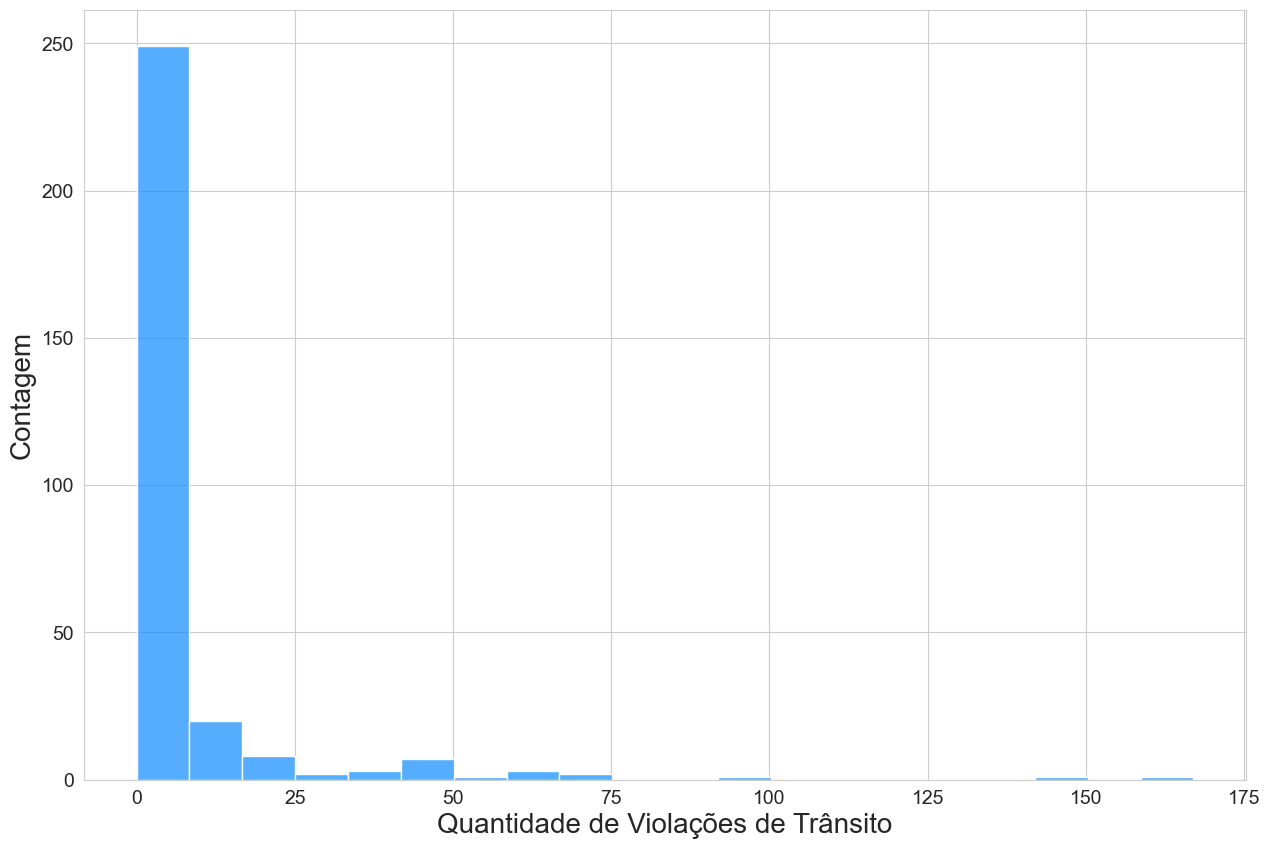

In [13]:
# In[3]: Histograma da variável dependente 'violations'

with sns.axes_style("whitegrid"):
    plt.figure(figsize=(15,10))
    sns.histplot(data=df_corruption, x='violations', bins=20,
                 color='dodgerblue', edgecolor='white', kde=False)
    plt.xlabel('Quantidade de Violações de Trânsito', fontsize=20)
    plt.ylabel('Contagem', fontsize=20)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.show()

Podemos ver que esse é um caso de sobredispersão.

In [14]:
# In[4]: Diagnóstico preliminar para observação de eventual igualdade entre a
#média e a variância da variável dependente 'violations'

pd.DataFrame({'Média':[df_corruption.violations.mean()],
              'Variância':[df_corruption.violations.var()]})

,Média,Variância
0,6.496644,331.617834


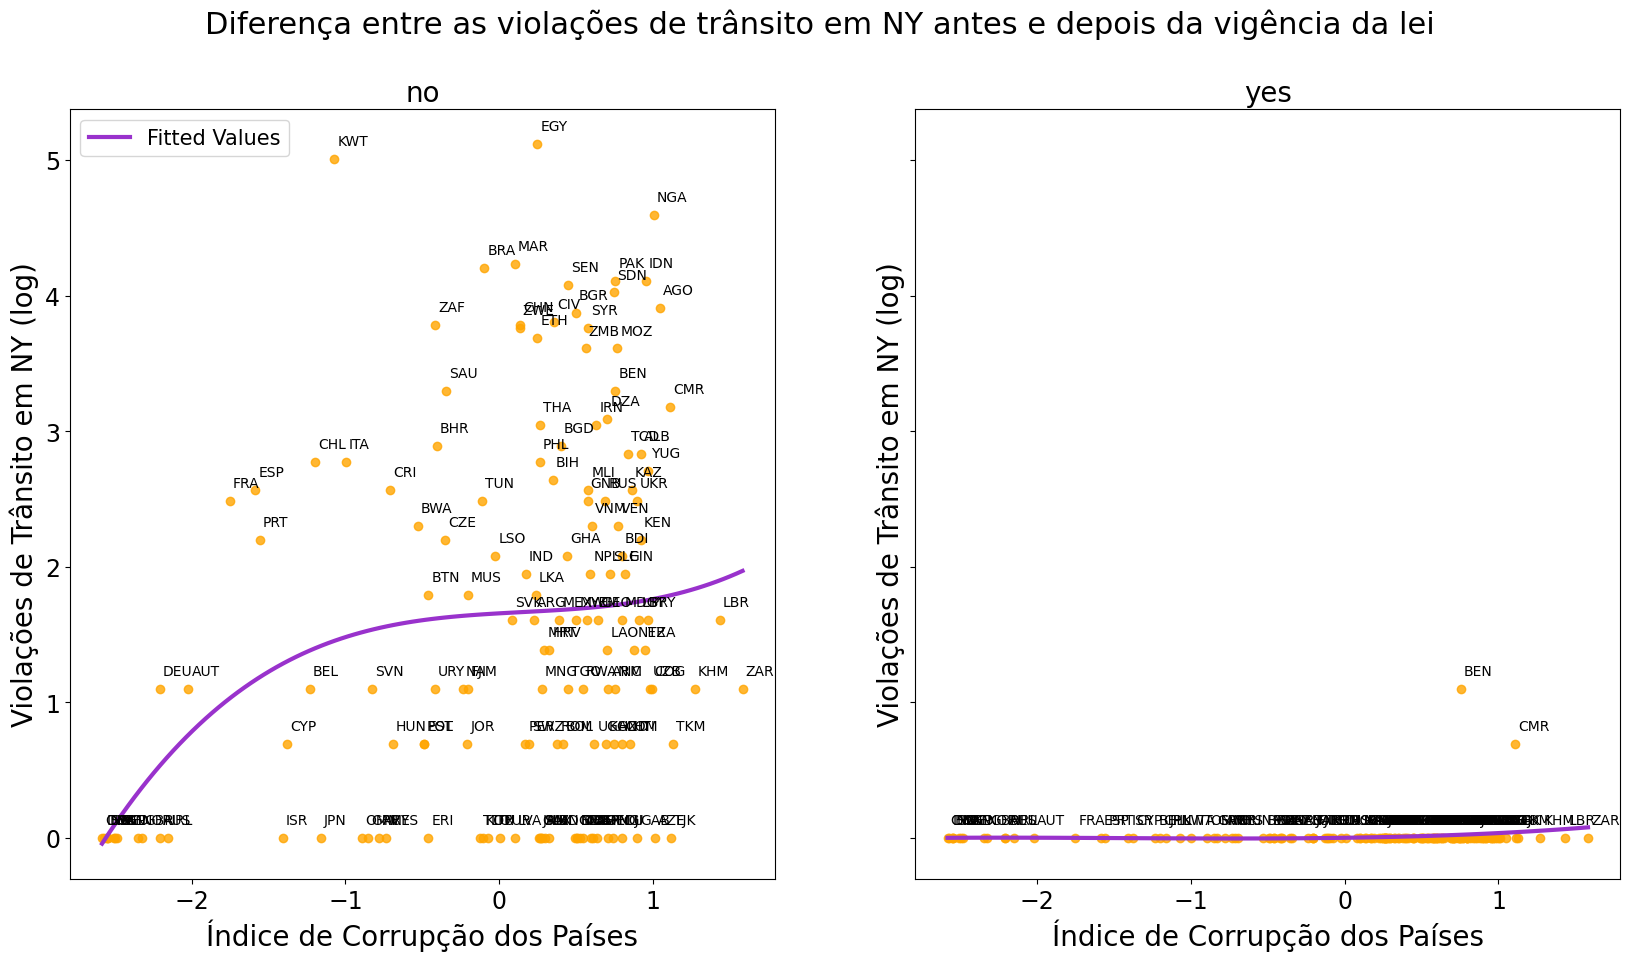

In [15]:
# In[5]: Comportamento das variáveis 'corruption' e 'violations' antes e
#depois do início da vigência da lei

fig, axs = plt.subplots(ncols=2, figsize=(20,10), sharey=True)

fig.suptitle('Diferença entre as violações de trânsito em NY antes e depois da vigência da lei',
             fontsize=22)

post = ['no', 'yes']

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.02, point['y']+.1, str(point['val']))

for i, v in enumerate(post):
    df = df_corruption[df_corruption.post==v]
    df['violations'] = np.log(df.violations)
    df.loc[df['violations'] == np.inf, 'violations'] = 0
    df.loc[df['violations'] == -np.inf, 'violations'] = 0
    sns.regplot(data=df, x='corruption', y='violations',
                order=3, ax=axs[i], ci=False,
                line_kws={'color':'darkorchid', 'linewidth': 3,
                          'label':'Fitted Values'},
                scatter_kws={'color':'orange'})
    axs[i].set_title(v, fontsize=20)
    axs[i].set_ylabel("Violações de Trânsito em NY (log)", fontsize=20)
    axs[i].set_xlabel("Índice de Corrupção dos Países", fontsize=20)
    label_point(df.corruption, df.violations, df.code, axs[i])

for ax in axs:
    ax.tick_params(axis='both', which='major', labelsize=17)
    
axs[0].legend(loc='upper left', fontsize=15)

plt.show()

O gráfico acima está na escala log, portanto 165 por exemplo seria aprox. $e^{5.106}$

## Estimação do modelo Poisson

In [16]:
# In[6]: Estimação do modelo Poisson

# O argumento 'family=sm.families.Poisson()' da função 'smf.glm' define a
#estimação de um modelo Poisson

modelo_poisson = smf.glm(formula='violations ~ staff + post + corruption',
                         data=df_corruption,
                         family=sm.families.Poisson()).fit()

# Parâmetros do 'modelo_poisson'
modelo_poisson.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:             violations   No. Observations:                  298
Model:                            GLM   Df Residuals:                      294
Model Family:                 Poisson   Df Model:                            3
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2071.8
Date:                Sat, 28 Sep 2024   Deviance:                       3644.0
Time:                        10:34:09   Pearson chi2:                 6.77e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.9999
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       2.2127      0.031     71.134      0.000       2.152       2.274
post[T.yes]    -4.2968      0.197    -21.762      0.000      -4.684      -3.910
staff           0.0219      0.001     17.807      0.000       0.019       0.024
corruption      0.3418      0.027     12.430      0.000       0.288       0.396
===============================================================================
"""

Nota, a variável post foi dummyzada automaticamente.

In [17]:
# In[7]: Outro modo mais completo de apresentar os outputs do modelo,
#pela função 'summary_col'

summary_col([modelo_poisson],
            model_names=["MODELO"],
            stars=True,
            info_dict = {
                'N':lambda x: "{0:d}".format(int(x.nobs)),
                'Log-lik':lambda x: "{:.2f}".format(x.llf)
        })

,MODELO
Intercept,2.2127***
,(0.0311)
post[T.yes],-4.2968***
,(0.1974)
staff,0.0219***
,(0.0012)
corruption,0.3418***
,(0.0275)
N,298
Log-lik,-2071.79


## Teste de Superdispersão

Mesmo com os parâmetros sendo estatisticamente significantes, será que isso é suficiente para afirmar que a função Poisson é a mais adequada? Para responder isso, precisamos fazer o **Teste de Superdispersão**.

No Teste de Superdispersão, é criada uma variável $Y^{*}_i = \dfrac{(Y_i^* - \lambda_\text{poisson i})^2 - Y_i}{\lambda_\text{poisson i}}$

Caso o seguinte modelo apresente $\beta$ estatisticamente significante, então os dados apresentam superdispersão.

In [18]:
##############################################################################
#           TESTE DE SUPERDISPERSÃO DE CAMERON E TRIVEDI (1990)              #
##############################################################################
# CAMERON, A. C.; TRIVEDI, P. K. Regression-based tests for overdispersion in
#the Poisson model. Journal of Econometrics, v. 46, n. 3, p. 347-364, 1990.

# 1º Passo: estimar um modelo Poisson;
# 2º Passo: criar uma nova variável (Y*) utilizando os fitted values do modelo
#Poisson estimado anteriormente;
# 3º Passo: estimar um modelo auxiliar OLS, com a variável Y* como variável
#dependente, os fitted values do modelo Poisson como única variável preditora e 
#sem o intercepto;
# 4º Passo: Observar a significância do parâmetro beta.

# Adicionando os fitted values do modelo Poisson ('lambda_poisson') ao dataframe
df_corruption['lambda_poisson'] = modelo_poisson.fittedvalues
df_corruption

,country,code,violations,staff,post,corruption,lambda_poisson
0,Angola,AGO,50,9,no,1.047506,15.919915
1,Angola,AGO,1,9,yes,1.047506,0.216711
2,Albania,ALB,17,3,no,0.921079,13.371720
3,Albania,ALB,0,3,yes,0.921079,0.182023
4,United Arab Emirates,ARE,0,3,no,-0.779468,7.477915
...,...,...,...,...,...,...,...
293,Zaire,ZAR,0,6,yes,1.582807,0.243691
294,Zambia,ZMB,37,9,no,0.562193,13.486751
295,Zambia,ZMB,0,9,yes,0.562193,0.183589
296,Zimbabwe,ZWE,43,14,no,0.133379,12.994217


In [19]:
# Criando a nova variável Y* ('ystar')
df_corruption['ystar'] = (((df_corruption['violations']
                            -df_corruption['lambda_poisson'])**2)
                          -df_corruption['violations'])/df_corruption['lambda_poisson']
df_corruption

,country,code,violations,staff,post,corruption,lambda_poisson,ystar
0,Angola,AGO,50,9,no,1.047506,15.919915,69.815208
1,Angola,AGO,1,9,yes,1.047506,0.216711,-1.783289
2,Albania,ALB,17,3,no,0.921079,13.371720,-0.286843
3,Albania,ALB,0,3,yes,0.921079,0.182023,0.182023
4,United Arab Emirates,ARE,0,3,no,-0.779468,7.477915,7.477915
...,...,...,...,...,...,...,...,...
293,Zaire,ZAR,0,6,yes,1.582807,0.243691,0.243691
294,Zambia,ZMB,37,9,no,0.562193,13.486751,38.250347
295,Zambia,ZMB,0,9,yes,0.562193,0.183589,0.183589
296,Zimbabwe,ZWE,43,14,no,0.133379,12.994217,65.979120


In [20]:
# Estimando o modelo auxiliar OLS, sem o intercepto
modelo_auxiliar = sm.OLS.from_formula('ystar ~ 0 + lambda_poisson',
                                      df_corruption).fit()

# Parâmetros do 'modelo_auxiliar'
modelo_auxiliar.summary()

# Caso o p-value do parâmetro de lambda_poisson seja maior que 0.05,
#verifica-se a existência de equidispersão nos dados.
# Caso contrário, diagnostica-se a existência de superdispersão nos dados, fato
#que favorecerá a estimação de um modelo binomial negativo, como ocorre nesse
#caso.

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  ystar   R-squared (uncentered):                   0.025
Model:                            OLS   Adj. R-squared (uncentered):              0.022
Method:                 Least Squares   F-statistic:                              7.584
Date:                Sat, 28 Sep 2024   Prob (F-statistic):                     0.00625
Time:                        10:34:09   Log-Likelihood:                         -1952.9
No. Observations:                 298   AIC:                                      3908.
Df Residuals:                     297   BIC:                                      3911.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
lambda_poisson     2.6525      0.963      2.754      0.006       0.757       4.548
==============================================================================
Omnibus:                      607.263   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           446004.649
Skew:                          13.265   Prob(JB):                         0.00
Kurtosis:                     190.659   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Teste infalível do Professor Fávero (Teste de superdispersão)

In [21]:
# In[9]: Função 'overdisp'

# Uma abordagem mais direta para a detecção da superdispersão pelo Teste de
#Cameron e Trivedi (1990) é por meio da utilização da função 'overdisp' do
#pacote 'statstests.tests'

# Instalação e carregamento da função 'overdisp' do pacote 'statstests.tests'
# Autores do pacote: Luiz Paulo Fávero e Helder Prado Santos
# https://stats-tests.github.io/statstests/

from statstests.tests import overdisp

# Elaboração direta do teste de superdispersão
overdisp(modelo_poisson, df_corruption)

Estimating model...: 
 GLM
                        Results: Ordinary least squares
Model:                  OLS              Adj. R-squared (uncentered): 0.022    
Dependent Variable:     ystar            AIC:                         3907.7809
Date:                   2024-09-28 10:34 BIC:                         3911.4780
No. Observations:       298              Log-Likelihood:              -1952.9  
Df Model:               1                F-statistic:                 7.584    
Df Residuals:           297              Prob (F-statistic):          0.00625  
R-squared (uncentered): 0.025            Scale:                       28915.   
-------------------------------------------------------------------------------------
            Coef.        Std.Err.         t          P>|t|        [0.025       0.975]
-------------------------------------------------------------------------------------
lmbda       2.6525         0.9632       2.7538       0.0063       0.7569       4.5480
-------------

In [22]:
# In[10]: Apenas para fins didáticos, caso considerássemos a estimação Poisson
#como a mais adequada, qual seria a quantidade média esperada de violações
#de trânsito para um país cujo corpo diplomático fosse composto por 23 membros,
#considerando o período anterior à vigência da lei e cujo índice de corrupção
#seja igual a 0.5?

modelo_poisson.predict(pd.DataFrame({'staff':[23],
                                     'post':['no'],
                                     'corruption':[0.5]}))

0    17.93284
dtype: float64

In [23]:
# Qual seria a quantidade média esperada de violações de trânsito para o mesmo
#país, porém agora considerando a vigência da lei?

modelo_poisson.predict(pd.DataFrame({'staff':[23],
                                     'post':['yes'],
                                     'corruption':[0.5]}))

0    0.244112
dtype: float64

## Fazendo predições

In [24]:
# In[10]: Apenas para fins didáticos, caso considerássemos a estimação Poisson
#como a mais adequada, qual seria a quantidade média esperada de violações
#de trânsito para um país cujo corpo diplomático fosse composto por 23 membros,
#considerando o período anterior à vigência da lei e cujo índice de corrupção
#seja igual a 0.5?

modelo_poisson.predict(pd.DataFrame({'staff':[23],
                                     'post':['no'],
                                     'corruption':[0.5]}))

0    17.93284
dtype: float64

In [25]:
# Qual seria a quantidade média esperada de violações de trânsito para o mesmo
#país, porém agora considerando a vigência da lei?

modelo_poisson.predict(pd.DataFrame({'staff':[23],
                                     'post':['yes'],
                                     'corruption':[0.5]}))

0    0.244112
dtype: float64

Poderíamos utilizar também o seguinte código:

In [26]:
def prediction(post, staff, corruption):
    return(np.exp(2.2127 - 4.2968*post + 0.0219*staff + 0.3418*corruption))

prediction(0, 20, 1)

19.935458892369443

# Regressão para dados de contagem - Função Binomial Negativa

## Estimação do modelo Binomial Negativa

In [31]:
# In[11]: Estimação do modelo binomial negativo do tipo NB2

# O argumento 'family=sm.families.NegativeBinomial(alpha=2.0963)' da função
#'smf.glm' define a estimação de um modelo binomial negativo do tipo NB2
#com valor de 'fi' ('alpha' no Python) igual a 2.0963 (valor proveniente da
#estimação realizada por meio do Solver do Excel). Lembramos que 'fi' é o
#inverso do parâmetro de forma 'theta' da distribuição Poisson-Gama.

modelo_bneg = smf.glm(formula='violations ~ staff + post + corruption',
                      data=df_corruption,
                      family=sm.families.NegativeBinomial(alpha=2.0963)).fit()

# Parâmetros do 'modelo_bneg'
modelo_bneg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:             violations   No. Observations:                  298
Model:                            GLM   Df Residuals:                      294
Model Family:        NegativeBinomial   Df Model:                            3
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -567.40
Date:                Sat, 28 Sep 2024   Deviance:                       239.13
Time:                        11:23:39   Pearson chi2:                     466.
No. Iterations:                    18   Pseudo R-squ. (CS):             0.6714
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       1.9469      0.162     12.050      0.000       1.630       2.264
post[T.yes]    -4.2746      0.266    -16.071      0.000      -4.796      -3.753
staff           0.0400      0.009      4.497      0.000       0.023       0.057
corruption      0.4527      0.115      3.950      0.000       0.228       0.677
===============================================================================
"""

Atenção: Esse método utiliza um input que vem do solver. O `alpha` é o $\phi$ da fórmula da binomial negativa. Podemos fazer um método mais direto mostrado a seguir:

In [36]:

modelo_bneg_direto = sm.NegativeBinomial.from_formula('violations ~ staff + post + corruption', data= df_corruption).fit()

modelo_bneg_direto.summary()

Optimization terminated successfully.
         Current function value: 1.904031
         Iterations: 19
         Function evaluations: 23
         Gradient evaluations: 23


<class 'statsmodels.iolib.summary.Summary'>
"""
                     NegativeBinomial Regression Results                      
==============================================================================
Dep. Variable:             violations   No. Observations:                  298
Model:               NegativeBinomial   Df Residuals:                      294
Method:                           MLE   Df Model:                            3
Date:                Sat, 28 Sep 2024   Pseudo R-squ.:                  0.1549
Time:                        11:27:03   Log-Likelihood:                -567.40
converged:                       True   LL-Null:                       -671.37
Covariance Type:            nonrobust   LLR p-value:                 8.088e-45
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       1.9469      0.205      9.477      0.000       1.544       2.350
post[T.yes]    -4.2746      0.266    -16.065      0.000      -4.796      -3.753
staff           0.0400      0.014      2.945      0.003       0.013       0.067
corruption      0.4527      0.133      3.396      0.001       0.191       0.714
alpha           2.0963      0.243      8.614      0.000       1.619       2.573
===============================================================================
"""

Como valor de $\phi$ (`alpha`) é estatisticamente significante, então ficamos com o modelo binomial negativa ao invés da Poisson. Isso vai de encontro com o diagnóstico da média ser muito menor que a média, e o teste de superdispersão dar positivo.

## Estimando o valor de $\phi$ por método de convergência

Esse é um método alternativo ao solver do Excel

In [37]:
# In[12]: Construção de uma função para a definição do 'fi' ótimo (argumento 'alpha')
# que gera a maximização do valor de Log-Likelihood

# Tempo aproximado de estimação desta célula: 1 min 40 seg

from tqdm import tqdm # para mostrar o progresso do loop

n_samples = 10000
alphas = np.linspace(0, 10, n_samples)
llf = np.full(n_samples, fill_value=np.nan)

for i, alpha in tqdm(enumerate(alphas), total=n_samples, desc='Estimating'):
    try:
        model = smf.glm(formula='violations ~ staff + post + corruption',
                        data=df_corruption,
                        family=sm.families.NegativeBinomial(alpha=alpha)).fit()
    except:
        continue
    llf[i] = model.llf

fi_ótimo = alphas[np.nanargmax(llf)].round(4)
fi_ótimo

Estimating: 100%|████████████████████████████████████████████████████████████████| 10000/10000 [03:46<00:00, 44.14it/s]


2.0962

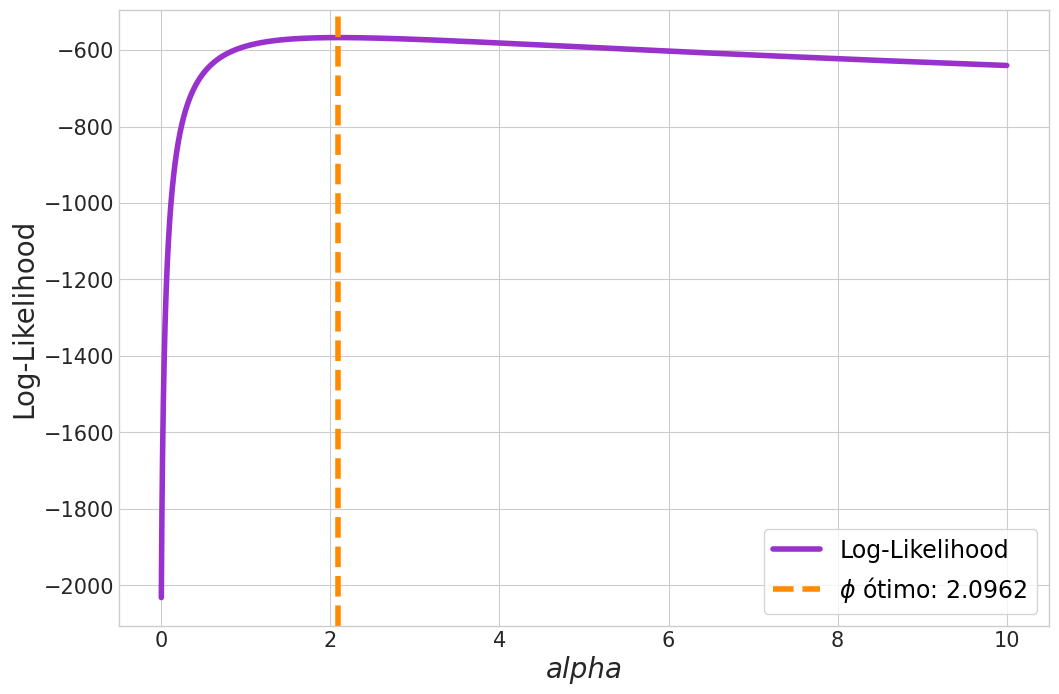

In [38]:
# In[13]: Plotagem dos resultados (Log-likelihood x fi)

plt.figure(figsize=(12, 8))
with plt.style.context('seaborn-v0_8-whitegrid'):
    plt.plot(alphas, llf, label='Log-Likelihood', color='darkorchid', linewidth = 4)
    plt.axvline(x=fi_ótimo, color='darkorange', linewidth = 4, linestyle='dashed',
            label=f'$\phi$ ótimo: {round(fi_ótimo, 4)}')
plt.xlabel('alpha', fontsize=20, style='italic')
plt.ylabel('Log-Likelihood', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(loc='lower right', fontsize=17)
plt.show()

In [39]:
# In[14]: Reestimação do modelo binomial negativo com o parâmetro 'fi_ótimo'

modelo_bneg = smf.glm(formula='violations ~ staff + post + corruption',
                      data=df_corruption,
                      family=sm.families.NegativeBinomial(alpha=fi_ótimo)).fit()

# Parâmetros do 'modelo_bneg'
modelo_bneg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:             violations   No. Observations:                  298
Model:                            GLM   Df Residuals:                      294
Model Family:        NegativeBinomial   Df Model:                            3
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -567.40
Date:                Sat, 28 Sep 2024   Deviance:                       239.14
Time:                        11:36:52   Pearson chi2:                     466.
No. Iterations:                    18   Pseudo R-squ. (CS):             0.6714
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       1.9469      0.162     12.050      0.000       1.630       2.264
post[T.yes]    -4.2746      0.266    -16.071      0.000      -4.796      -3.753
staff           0.0400      0.009      4.497      0.000       0.023       0.057
corruption      0.4527      0.115      3.950      0.000       0.228       0.677
===============================================================================
"""

## Comparação do modelo Poisson e Binomial Negativa

In [40]:
# In[15]: Comparando os modelos Poisson e binomial negativo

summary_col([modelo_poisson, modelo_bneg], 
            model_names=["Poisson","BNeg"],
            stars=True,
            info_dict = {
                'N':lambda x: "{0:d}".format(int(x.nobs)),
                'Log-lik':lambda x: "{:.2f}".format(x.llf)
                })

,Poisson,BNeg
Intercept,2.2127***,1.9469***
,(0.0311),(0.1616)
post[T.yes],-4.2968***,-4.2746***
,(0.1974),(0.2660)
staff,0.0219***,0.0400***
,(0.0012),(0.0089)
corruption,0.3418***,0.4527***
,(0.0275),(0.1146)
Log-lik,-2071.79,-567.40
N,298,298


## Razão de Verossimilhança

In [42]:
# In[16]: Definição da função para realização do teste de razão de verossimilhança

# Definição da função 'lrtest'

def lrtest(modelos):
    modelo_1 = modelos[0]
    llk_1 = modelo_1.llnull
    llk_2 = modelo_1.llf
    
    if len(modelos)>1:
        llk_1 = modelo_1.llf
        llk_2 = modelos[1].llf
    LR_statistic = -2*(llk_1-llk_2)
    p_val = stats.chi2.sf(LR_statistic, 1) # 1 grau de liberdade
    
    print("Likelihood Ratio Test:")
    print(f"-2.(LL0-LLm): {round(LR_statistic, 2)}")
    print(f"p-value: {p_val:.3f}")
    print("")
    print("==================Result======================== \n")
    if p_val <= 0.05:
        print("H1: Different models, favoring the one with the highest Log-Likelihood")
    else:
        print("H0: Models with log-likelihoods that are not statistically different at 95% confidence level")

In [43]:
# In[17]: Teste de de razão de verossimilhança para comparar as estimações dos
#'modelo_poisson' e 'modelo_bneg'

lrtest([modelo_poisson, modelo_bneg])

Likelihood Ratio Test:
-2.(LL0-LLm): 3008.79
p-value: 0.000

==================Result======================== 

H1: Different models, favoring the one with the highest Log-Likelihood


In [44]:
# In[18]: Gráfico para a comparação dos LogLiks dos modelos Poisson e
#binomial negativo

# Definição do dataframe com os modelos e respectivos LogLiks
df_llf = pd.DataFrame({'modelo':['Poisson','BNeg'],
                      'loglik':[modelo_poisson.llf, modelo_bneg.llf]})
df_llf

,modelo,loglik
0,Poisson,-2071.793753
1,BNeg,-567.401172


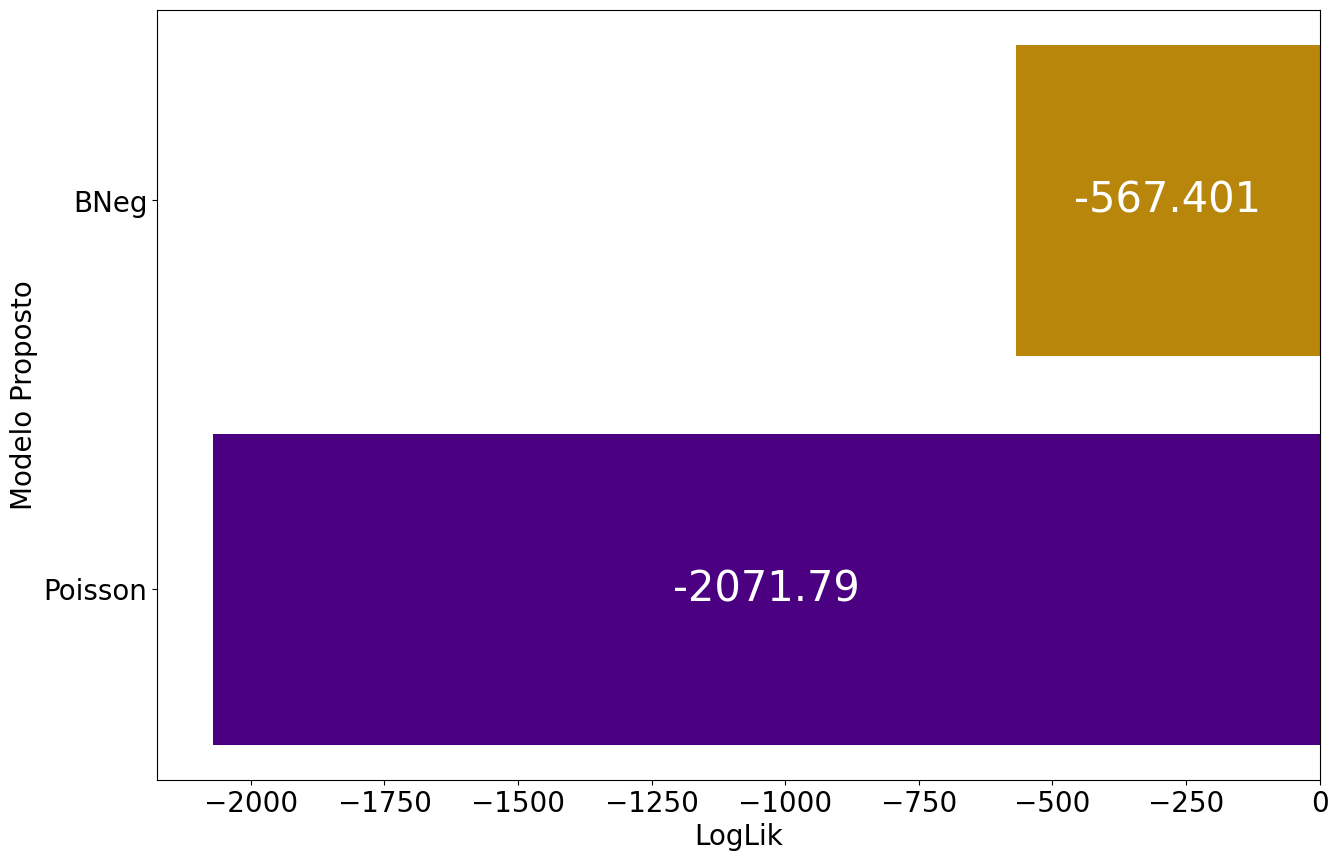

In [45]:
# Plotagem propriamente dita
fig, ax = plt.subplots(figsize=(15,10))

c = ['indigo', 'darkgoldenrod']

ax1 = ax.barh(df_llf.modelo,df_llf.loglik, color = c)
ax.bar_label(ax1, label_type='center', color='white', fontsize=30)
ax.set_ylabel("Modelo Proposto", fontsize=20)
ax.set_xlabel("LogLik", fontsize=20)
ax.tick_params(axis='y', labelsize=20)
ax.tick_params(axis='x', labelsize=20)
plt.show()

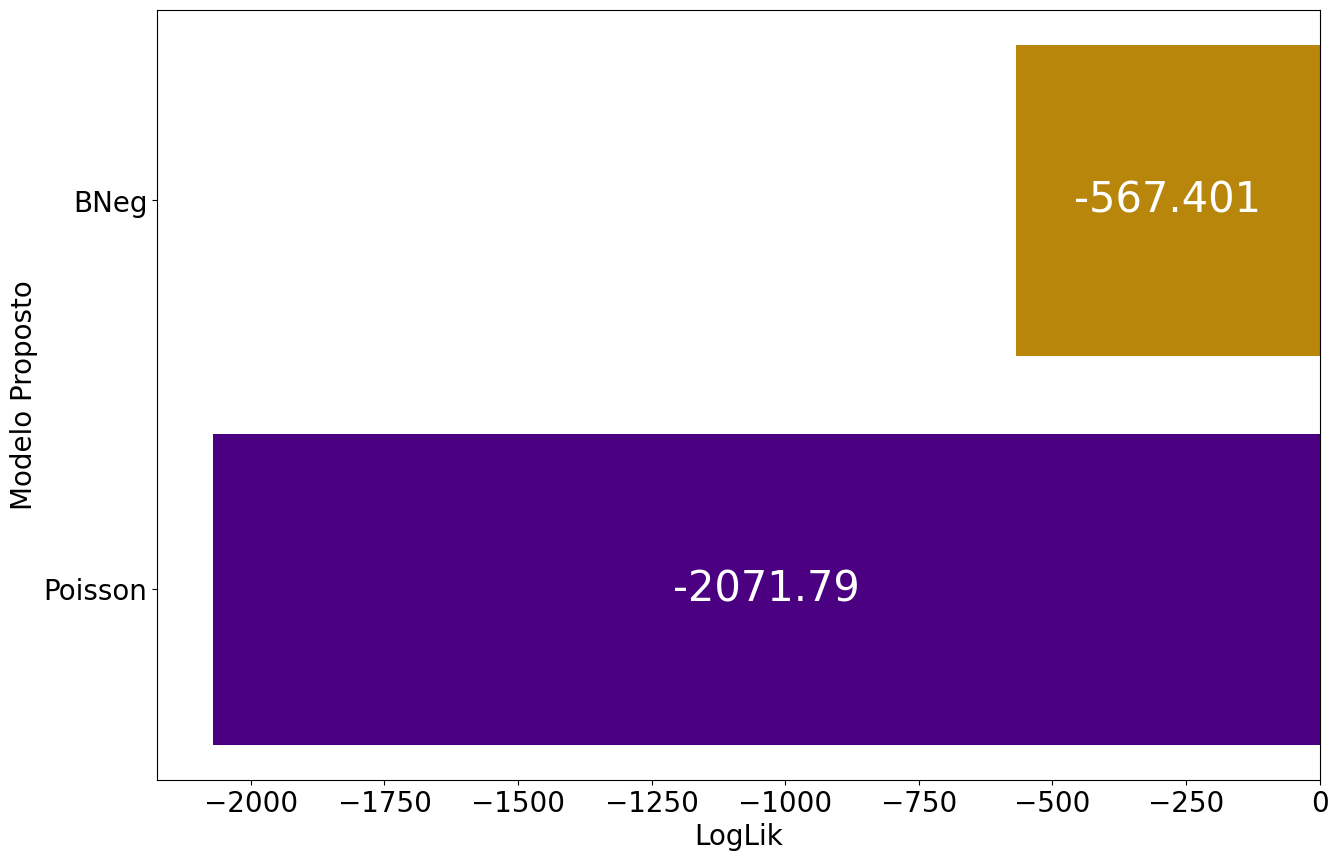

In [46]:
# In[19]: Gráfico para a comparação dos LogLiks dos modelos Poisson e
#binomial negativo, com JPG para fins didáticos

import urllib.request
from PIL import Image

# Define a URL da imagem
url = "https://i.pinimg.com/474x/80/9b/40/809b40f1c99aec99cccbb53d0dc587c5.jpg"

# Carrega a imagem da URL
imagem = Image.open(urllib.request.urlopen(url))

# Define as dimensões e a posição desejada da imagem
nova_largura = 2000  # Largura da imagem redimensionada
nova_altura = 2000   # Altura da imagem redimensionada
posicao_x = 4500       # Posição horizontal da imagem
posicao_y = 3600       # Posição vertical da imagem

# Redimensiona a imagem
imagem_redimensionada = imagem.resize((nova_largura, nova_altura))

# Definição do dataframe com os modelos e respectivos LogLiks
df_llf = pd.DataFrame({'modelo': ['Poisson', 'BNeg'],
                       'loglik': [modelo_poisson.llf, modelo_bneg.llf]})

# Plotagem propriamente dita
fig, ax = plt.subplots(figsize=(15, 10))

c = ['indigo', 'darkgoldenrod']

ax1 = ax.barh(df_llf.modelo, df_llf.loglik, color=c)
ax.bar_label(ax1, label_type='center', color='white', fontsize=30)
ax.set_ylabel("Modelo Proposto", fontsize=20)
ax.set_xlabel("LogLik", fontsize=20)
ax.tick_params(axis='y', labelsize=20)
ax.tick_params(axis='x', labelsize=20)

# Adiciona a imagem redimensionada em uma posição específica do gráfico
plt.figimage(imagem_redimensionada, posicao_x, posicao_y, zorder=1, alpha=0.73)

# Exibe o gráfico com a imagem
plt.show()

## Fazendo predições

O cálculo manual do fit do modelo binomial negativa é dado por:

\begin{equation}
p(Y_i) = e^{\phi + \beta_1*X_{1i} + \beta_2*X_{2i} + \dots + \beta_n*X_{ni}}
\end{equation}

In [48]:
modelo_bneg.params

Intercept      1.946890
post[T.yes]   -4.274634
staff          0.040018
corruption     0.452654
dtype: float64

In [47]:
# In[20]: COMPARAÇÕES ENTRE AS PREVISÕES:

# Qual seria a quantidade média esperada de violações de trânsito para um país
#cujo corpo diplomático seja composto por 23 membros, considerando o período
#anterior à vigência da lei e cujo índice de corrupção seja igual 0.5?

# Modelo Poisson:

modelo_poisson.predict(pd.DataFrame({'staff':[23],
                                     'post':['no'],
                                     'corruption':[0.5]}))

# Modelo binomial negativo:

modelo_bneg.predict(pd.DataFrame({'staff':[23],
                                  'post':['no'],
                                  'corruption':[0.5]}))

0    22.057246
dtype: float64

In [50]:
# In[21]: COMPARAÇÕES ENTRE AS PREVISÕES (continuação):

# Qual seria a quantidade média esperada de violações de trânsito para o mesmo
#país, porém agora considerando a vigência da lei?

# Modelo Poisson:
    
modelo_poisson.predict(pd.DataFrame({'staff':[23],
                                     'post':['yes'],
                                     'corruption':[0.5]}))

# Modelo binomial negativo:

modelo_bneg.predict(pd.DataFrame({'staff':[23],
                                  'post':['yes'],
                                  'corruption':[0.5]}))


0    0.306974
dtype: float64

## Comparando os valores previstos com a base de dados

In [51]:
# In[22]: Adicionando os fitted values dos modelos estimados até o momento,
#para fins de comparação

# Modelo Poisson:
df_corruption['fitted_poisson'] = modelo_poisson.fittedvalues

# Modelo binomial negativo:
df_corruption['fitted_bneg'] = modelo_bneg.fittedvalues

# Visualização do dataframe com os fitted values do modelos estimados
df_corruption[['country','code','violations','fitted_poisson','fitted_bneg']]

,country,code,violations,fitted_poisson,fitted_bneg
0,Angola,AGO,50,15.919915,16.138592
1,Angola,AGO,1,0.216711,0.224603
2,Albania,ALB,17,13.371720,11.987630
3,Albania,ALB,0,0.182023,0.166834
4,United Arab Emirates,ARE,0,7.477915,5.551770
...,...,...,...,...,...
293,Zaire,ZAR,0,0.243691,0.253810
294,Zambia,ZMB,37,13.486751,12.955688
295,Zambia,ZMB,0,0.183589,0.180306
296,Zimbabwe,ZWE,43,12.994217,13.033499


<function matplotlib.pyplot.show(close=None, block=None)>

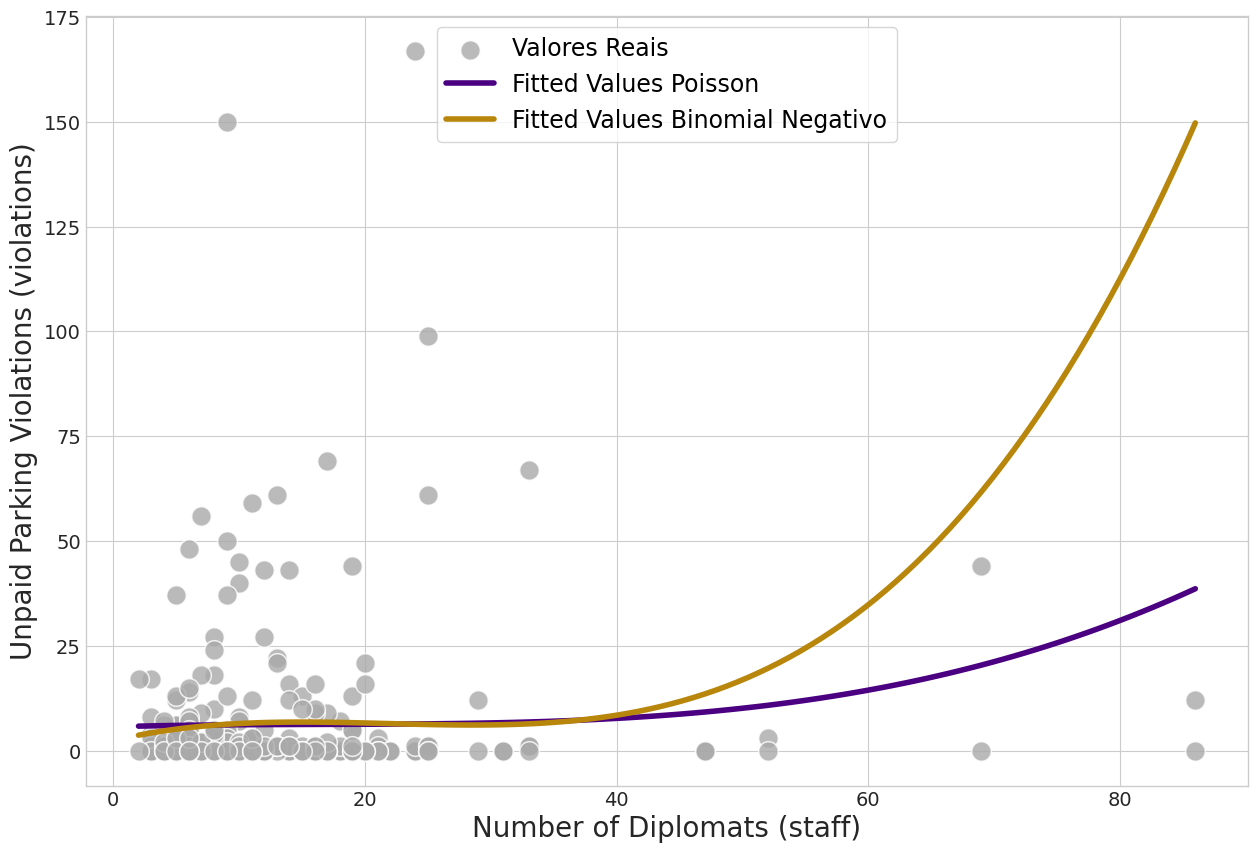

In [52]:
# In[23]: Fitted values dos modelos Poisson e binomial negativo, considerando,
#para fins didáticos, apenas a variável preditora 'staff'

plt.figure(figsize=(15,10))
with plt.style.context('seaborn-v0_8-whitegrid'):
    sns.scatterplot(x='staff', y='violations', data=df_corruption, color='darkgrey',
                s=200, label='Valores Reais', alpha=0.8)
    sns.regplot(data=df_corruption, x='staff', y='fitted_poisson', order=3, ci=False,
            scatter=False, color='indigo',
            label='Fitted Values Poisson',
            line_kws={'linewidth': 4})
    sns.regplot(data=df_corruption, x='staff', y='fitted_bneg', order=3, ci=False,
            scatter = False, color='darkgoldenrod',
            label='Fitted Values Binomial Negativo',
            line_kws={'linewidth': 4})
plt.xlabel('Number of Diplomats (staff)', fontsize=20)
plt.ylabel('Unpaid Parking Violations (violations)', fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='upper center', fontsize=17)
plt.show

# Regressão para dados de contagem - Base de dados sem superdispersão

## Construindo a base de dados

In [54]:
# In[24]:
##############################################################################
#     ESTIMAÇÕES MUITO PRÓXIMAS PARA POISSON E BNEG SEM SUPERDISPERSÃO!      #
##############################################################################

# Para fins didáticos, vamos gerar novo dataframe 'df_corruption2', com quantidades
#de violações de trânsito iguais, no máximo, a 3. Este procedimento poderá,
#eventualmente, eliminar o fenômeno da superdispersão nos dados da variável
#dependente e, consequentemente, tornar as estimações dos modelos POISSON e
#BINOMIAL NEGATIVO praticamente iguais.

# Gerando novo dataframe ('df_corruption2') com seleção das variáveis originais
df_corruption2 = df_corruption.iloc[:, 0:6]

# Seleção das observações com 'violations' menores ou iguais a 3
df_corruption2 = df_corruption2[df_corruption2['violations'] <= 3]

In [55]:
# Visualização do dataframe 'df_corruption2'
df_corruption2

,country,code,violations,staff,post,corruption
1,Angola,AGO,1,9,yes,1.047506
3,Albania,ALB,0,3,yes,0.921079
4,United Arab Emirates,ARE,0,3,no,-0.779468
5,United Arab Emirates,ARE,0,3,yes,-0.779468
7,Argentina,ARG,0,19,yes,0.223567
...,...,...,...,...,...,...
291,South Africa,ZAF,1,19,yes,-0.415147
292,Zaire,ZAR,3,6,no,1.582807
293,Zaire,ZAR,0,6,yes,1.582807
295,Zambia,ZMB,0,9,yes,0.562193


In [56]:
# Características do dataframe (224 observações)
df_corruption2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 224 entries, 1 to 297
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     224 non-null    object 
 1   code        224 non-null    object 
 2   violations  224 non-null    int64  
 3   staff       224 non-null    int64  
 4   post        224 non-null    object 
 5   corruption  224 non-null    float64
dtypes: float64(1), int64(2), object(3)
memory usage: 12.2+ KB


In [57]:
# Estatísticas univariadas (note que o valor máximo de ocorrências na variável
#'violations' agora é 3)
df_corruption2.describe()

,violations,staff,corruption
count,224.000000,224.000000,224.000000
mean,0.526786,11.415179,-0.085940
std,0.922658,10.509101,1.085816
min,0.000000,2.000000,-2.582988
25%,0.000000,5.000000,-0.499298
50%,0.000000,9.000000,0.279324
75%,1.000000,14.000000,0.702910
max,3.000000,86.000000,1.582807


## Visualizando os dados

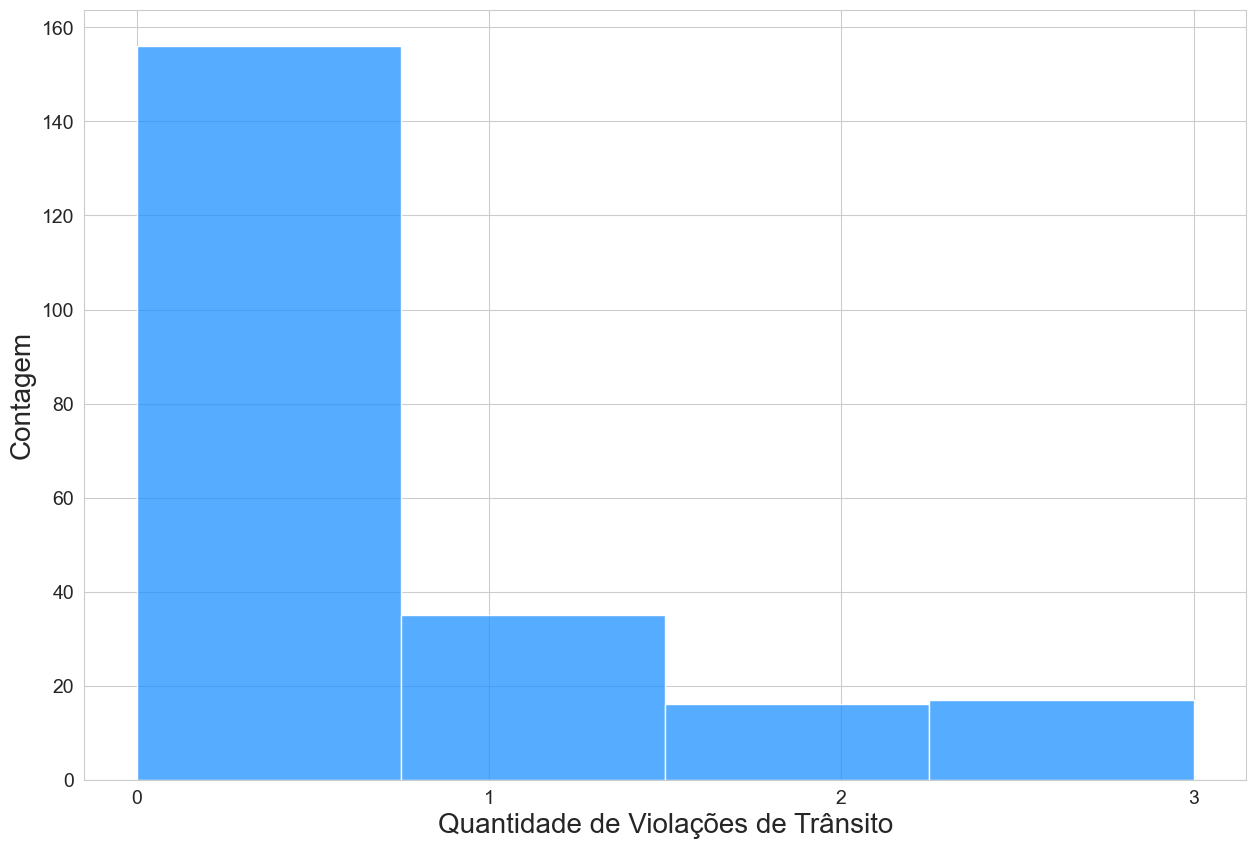

In [58]:
# In[25]: Histograma da variável dependente 'violations' no dataframe 'df_corruption2'

with sns.axes_style("whitegrid"):
    plt.figure(figsize=(15,10))
    sns.histplot(data=df_corruption2, x='violations', bins=4,
                 color='dodgerblue', edgecolor='white', kde=False)
    plt.xlabel('Quantidade de Violações de Trânsito', fontsize=20)
    plt.ylabel('Contagem', fontsize=20)
    plt.xticks(range(4), fontsize=14)
    plt.yticks(fontsize=14)
    plt.show()

## Estimação do modelo ideal

In [60]:
# In[26]: Diagnóstico preliminar para observação de eventual igualdade entre
#a média e a variância da variável dependente 'violations' no dataframe
#'df_corruption2'

pd.DataFrame({'Média':[df_corruption2['violations'].mean()],
              'Variância':[df_corruption2['violations'].var()]})

,Média,Variância
0,0.526786,0.851297


In [61]:
# In[27]: Estimação do 'modelo_poisson2'

modelo_poisson2 = smf.glm(formula='violations ~ staff + post + corruption',
                          data=df_corruption2,
                          family=sm.families.Poisson()).fit()

# Parâmetros do 'modelo_poisson2'
modelo_poisson2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:             violations   No. Observations:                  224
Model:                            GLM   Df Residuals:                      220
Model Family:                 Poisson   Df Model:                            3
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -179.47
Date:                Sat, 28 Sep 2024   Deviance:                       196.25
Time:                        12:01:40   Pearson chi2:                     243.
No. Iterations:                     5   Pseudo R-squ. (CS):             0.3919
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.1322      0.145      0.909      0.363      -0.153       0.417
post[T.yes]    -2.0552      0.226     -9.108      0.000      -2.497      -1.613
staff           0.0100      0.010      1.001      0.317      -0.010       0.030
corruption      0.3562      0.105      3.398      0.001       0.151       0.562
===============================================================================
"""

## Teste de superdispersão

O teste para verificar se há superdispersão é o Teste de Cameron e Trivedi.

In [62]:
# In[28]: Teste de superdispersão no dataset 'corruption2'

# Função 'overdisp'
# Instalação e carregamento da função 'overdisp' do pacote 'statstests.tests'
# Autores do pacote: Luiz Paulo Fávero e Helder Prado Santos
# https://stats-tests.github.io/statstests/

from statstests.tests import overdisp

# Elaboração direta do teste de superdispersão
overdisp(modelo_poisson2, df_corruption2)

Estimating model...: 
 GLM
                       Results: Ordinary least squares
Model:                  OLS              Adj. R-squared (uncentered): -0.004  
Dependent Variable:     ystar            AIC:                         899.5607
Date:                   2024-09-28 12:01 BIC:                         902.9724
No. Observations:       224              Log-Likelihood:              -448.78 
Df Model:               1                F-statistic:                 0.1004  
Df Residuals:           223              Prob (F-statistic):          0.752   
R-squared (uncentered): 0.000            Scale:                       3.2335  
-----------------------------------------------------------------------------------
              Coef.       Std.Err.        t         P>|t|        [0.025      0.975]
-----------------------------------------------------------------------------------
lmbda         0.0500        0.1577      0.3169      0.7516      -0.2607      0.3607
-----------------------------

Não há superdispersão

## Estimação do modelo Binomial Negativa

In [65]:
# In[29]: Estimação do modelo binomial negativo ('modelo_bneg2') no dataframe
#'df_corruption2'

from tqdm import tqdm # para mostrar o progresso do loop

n_samples = 1000
alphas = np.linspace(0, 10, n_samples)
llf = np.full(n_samples, fill_value=np.nan)

for i, alpha in tqdm(enumerate(alphas), total=n_samples, desc='Estimating'):
    try:
        model = smf.glm(formula='violations ~ staff + post + corruption',
                        data=df_corruption2,
                        family=sm.families.NegativeBinomial(alpha=alpha)).fit()
    except:
        continue
    llf[i] = model.llf

fi_ótimo2 = alphas[np.nanargmax(llf)].round(4)
fi_ótimo2

Estimating: 100%|██████████████████████████████████████████████████████████████████| 1000/1000 [00:18<00:00, 53.92it/s]


0.0901

In [66]:
# Estimação propriamente dita do 'modelo_bneg2'

modelo_bneg2 = smf.glm(formula='violations ~ staff + post + corruption',
                      data=df_corruption2,
                      family=sm.families.NegativeBinomial(alpha=fi_ótimo2)).fit()

# Parâmetros do 'modelo_bneg2'
modelo_bneg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:             violations   No. Observations:                  224
Model:                            GLM   Df Residuals:                      220
Model Family:        NegativeBinomial   Df Model:                            3
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -179.33
Date:                Sat, 28 Sep 2024   Deviance:                       186.10
Time:                        12:06:13   Pearson chi2:                     232.
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3767
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.1243      0.151      0.824      0.410      -0.172       0.420
post[T.yes]    -2.0603      0.231     -8.936      0.000      -2.512      -1.608
staff           0.0109      0.010      1.069      0.285      -0.009       0.031
corruption      0.3619      0.108      3.336      0.001       0.149       0.574
===============================================================================
"""

In [67]:
# In[30]: Comparando os parâmetros e os valores de LogLiks dos 'modelo_poisson2'
#e 'modelo_bneg2'

summary_col([modelo_poisson2, modelo_bneg2], 
            model_names=["Poisson","BNeg"],
            stars=True,
            info_dict = {
                'N':lambda x: "{0:d}".format(int(x.nobs)),
                'Log-lik':lambda x: "{:.2f}".format(x.llf)
                })

,Poisson,BNeg
Intercept,0.1322,0.1243
,(0.1453),(0.1510)
post[T.yes],-2.0552***,-2.0603***
,(0.2256),(0.2306)
staff,0.0100,0.0109
,(0.0100),(0.0102)
corruption,0.3562***,0.3619***
,(0.1048),(0.1085)
Log-lik,-179.47,-179.33
N,224,224


In [68]:
# In[31]: Definição da função para realização do teste de razão de verossimilhança

# Definição da função 'lrtest' (já definida anteriormente neste código)

def lrtest(modelos):
    modelo_1 = modelos[0]
    llk_1 = modelo_1.llnull
    llk_2 = modelo_1.llf
    
    if len(modelos)>1:
        llk_1 = modelo_1.llf
        llk_2 = modelos[1].llf
    LR_statistic = -2*(llk_1-llk_2)
    p_val = stats.chi2.sf(LR_statistic, 1) # 1 grau de liberdade
    
    print("Likelihood Ratio Test:")
    print(f"-2.(LL0-LLm): {round(LR_statistic, 2)}")
    print(f"p-value: {p_val:.3f}")
    print("")
    print("==================Result======================== \n")
    if p_val <= 0.05:
        print("H1: Different models, favoring the one with the highest Log-Likelihood")
    else:
        print("H0: Models with log-likelihoods that are not statistically different at 95% confidence level")


In [69]:
# In[32]: Teste de de razão de verossimilhança para comparar as estimações dos
#'modelo_poisson2' e 'modelo_bneg2'

lrtest([modelo_poisson2, modelo_bneg2])

# Quando não há superdispersão, não existem diferenças significantes entre os
#modelos Poisson e binomial negativo!

Likelihood Ratio Test:
-2.(LL0-LLm): 0.28
p-value: 0.596

==================Result======================== 

H0: Models with log-likelihoods that are not statistically different at 95% confidence level


# Regressão para Dados de Contagem - Modelo Zero Inflated

Nesse modelo, levaremos em conta o elevado número de zeros presentes na base de dados `corruption.csv`.

## Estimando o modelo Zero Inflated Poisson (ZIP)

In [78]:
# In[33]:
##############################################################################
#              ESTIMAÇÃO DO MODELO ZERO-INFLATED POISSON (ZIP)               #
##############################################################################

# Estimação do modelo ZIP pela função 'ZeroInflatedPoisson' do pacote
#'statsmodels.discrete.count_model'

# Definição da variável dependente (voltando ao dataset 'df_corruption')
y = df_corruption['violations']

# Definição das variáveis preditoras que entrarão no componente de contagem
x1 = df_corruption[['staff','post','corruption']]
X1 = sm.add_constant(x1)

# Dummização da variável 'post'
# Se estimarmos o modelo sem dummizar as variáveis categóricas, o modelo retorna
#um erro
X1 = pd.get_dummies(X1, columns=['post'], dtype=int, drop_first=True)

# Definição das variáveis preditoras que entrarão no componente logit (inflate)
x2 = df_corruption[['corruption']]
X2 = sm.add_constant(x2)

# O argumento 'exog_infl' corresponde às variáveis que entram no componente
#logit (inflate)
modelo_zip = sm.ZeroInflatedPoisson(y, X1, exog_infl=X2,
                                    inflation='logit').fit()

# Parâmetros do 'modelo_zip'
modelo_zip.summary()

Optimization terminated successfully.
         Current function value: 5.977545
         Iterations: 22
         Function evaluations: 27
         Gradient evaluations: 27


<class 'statsmodels.iolib.summary.Summary'>
"""
                     ZeroInflatedPoisson Regression Results                    
===============================================================================
Dep. Variable:              violations   No. Observations:                  298
Model:             ZeroInflatedPoisson   Df Residuals:                      294
Method:                            MLE   Df Model:                            3
Date:                 Sun, 29 Sep 2024   Pseudo R-squ.:                  0.1975
Time:                         17:44:26   Log-Likelihood:                -1781.3
converged:                        True   LL-Null:                       -2219.8
Covariance Type:             nonrobust   LLR p-value:                8.828e-190
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
inflate_const         -1.6116      0.240     -6.714      0.000      -2.082      -1.141
inflate_corruption    -0.9523      0.195     -4.875      0.000      -1.335      -0.569
const                  2.4889      0.032     78.990      0.000       2.427       2.551
staff                  0.0200      0.001     16.154      0.000       0.018       0.022
corruption             0.0937      0.030      3.127      0.002       0.035       0.152
post_yes              -4.2879      0.201    -21.291      0.000      -4.683      -3.893
======================================================================================
"""

## Teste de Vuong

In [79]:
# In[34]: Teste de Vuong

# VUONG, Q. H. Likelihood ratio tests for model selection and non-nested
#hypotheses. Econometrica, v. 57, n. 2, p. 307-333, 1989.

# Definição de função para elaboração do teste de Vuong
# Autores: Luiz Paulo Fávero e Helder Prado Santos

def vuong_test(m1, m2):

    from scipy.stats import norm    

    if m1.__class__.__name__ == "GLMResultsWrapper":
        
        glm_family = modelo_poisson.model.family

        X = pd.DataFrame(data=m1.model.exog, columns=m1.model.exog_names)
        y = pd.Series(m1.model.endog, name=m1.model.endog_names)

        if glm_family.__class__.__name__ == "Poisson":
            m1 = Poisson(endog=y, exog=X).fit()
            
        if glm_family.__class__.__name__ == "NegativeBinomial":
            m1 = NegativeBinomial(endog=y, exog=X, loglike_method='nb2').fit()

    supported_models = [ZeroInflatedPoisson,ZeroInflatedNegativeBinomialP,Poisson,NegativeBinomial]
    
    if type(m1.model) not in supported_models:
        raise ValueError(f"Model type not supported for first parameter. List of supported models: (ZeroInflatedPoisson, ZeroInflatedNegativeBinomialP, Poisson, NegativeBinomial) from statsmodels discrete collection.")
        
    if type(m2.model) not in supported_models:
        raise ValueError(f"Model type not supported for second parameter. List of supported models: (ZeroInflatedPoisson, ZeroInflatedNegativeBinomialP, Poisson, NegativeBinomial) from statsmodels discrete collection.")
    
    # Extração das variáveis dependentes dos modelos
    m1_y = m1.model.endog
    m2_y = m2.model.endog

    m1_n = len(m1_y)
    m2_n = len(m2_y)

    if m1_n == 0 or m2_n == 0:
        raise ValueError("Could not extract dependent variables from models.")

    if m1_n != m2_n:
        raise ValueError("Models appear to have different numbers of observations.\n"
                         f"Model 1 has {m1_n} observations.\n"
                         f"Model 2 has {m2_n} observations.")

    if np.any(m1_y != m2_y):
        raise ValueError("Models appear to have different values on dependent variables.")
        
    m1_linpred = pd.DataFrame(m1.predict(which="prob"))
    m2_linpred = pd.DataFrame(m2.predict(which="prob"))        

    m1_probs = np.repeat(np.nan, m1_n)
    m2_probs = np.repeat(np.nan, m2_n)

    which_col_m1 = [list(m1_linpred.columns).index(x) if x in list(m1_linpred.columns) else None for x in m1_y]    
    which_col_m2 = [list(m2_linpred.columns).index(x) if x in list(m2_linpred.columns) else None for x in m2_y]

    for i, v in enumerate(m1_probs):
        m1_probs[i] = m1_linpred.iloc[i, which_col_m1[i]]

    for i, v in enumerate(m2_probs):
        m2_probs[i] = m2_linpred.iloc[i, which_col_m2[i]]

    lm1p = np.log(m1_probs)
    lm2p = np.log(m2_probs)

    m = lm1p - lm2p

    v = np.sum(m) / (np.std(m) * np.sqrt(len(m)))

    pval = 1 - norm.cdf(v) if v > 0 else norm.cdf(v)

    print("Vuong Non-Nested Hypothesis Test-Statistic (Raw):")
    print(f"Vuong z-statistic: {round(v, 3)}")
    print(f"p-value: {pval:.3f}")
    print("")
    print("==================Result======================== \n")
    if pval <= 0.05:
        print("H1: Indicates inflation of zeros at 95% confidence level")
    else:
        print("H0: Indicates no inflation of zeros at 95% confidence level")

# In[35]: Teste de Vuong propriamente dito para verificação de existência de
#inflação de zeros no modelo ZIP, em comparação com o modelo Poisson

vuong_test(modelo_poisson, modelo_zip)

# Ocorrência de inflação de zeros!

Optimization terminated successfully.
         Current function value: 6.952328
         Iterations 9
Vuong Non-Nested Hypothesis Test-Statistic (Raw):
Vuong z-statistic: -2.993
p-value: 0.001

==================Result======================== 

H1: Indicates inflation of zeros at 95% confidence level


Podemos ver que há inflação de zeros, portanto o modelo ZIP é mais apropriado do que o modelo Poisson.

## Comparação dos modelos

In [80]:
# In[36]: Comparando os modelos Poisson e ZIP

summary_col([modelo_poisson, modelo_zip], 
            model_names=["Poisson","ZIP"],
            stars=True,
            info_dict = {
                'N':lambda x: "{0:d}".format(int(x.nobs)),
                'Log-lik':lambda x: "{:.2f}".format(x.llf)
                })

,Poisson,ZIP
Intercept,2.2127***,
,(0.0311),
post[T.yes],-4.2968***,
,(0.1974),
staff,0.0219***,0.0200***
,(0.0012),(0.0012)
corruption,0.3418***,0.0937***
,(0.0275),(0.0300)
inflate_const,,-1.6116***
,,(0.2401)


In [81]:
# In[37]: Definição da função para realização do teste de razão de verossimilhança

# Definição da função 'lrtest'

def lrtest(modelos):
    modelo_1 = modelos[0]
    llk_1 = modelo_1.llnull
    llk_2 = modelo_1.llf
    
    if len(modelos)>1:
        llk_1 = modelo_1.llf
        llk_2 = modelos[1].llf
    LR_statistic = -2*(llk_1-llk_2)
    p_val = stats.chi2.sf(LR_statistic, 2) # 2 graus de liberdade
    
    print("Likelihood Ratio Test:")
    print(f"-2.(LL0-LLm): {round(LR_statistic, 2)}")
    print(f"p-value: {p_val:.3f}")
    print("")
    print("==================Result======================== \n")
    if p_val <= 0.05:
        print("H1: Different models, favoring the one with the highest Log-Likelihood")
    else:
        print("H0: Models with log-likelihoods that are not statistically different at 95% confidence level")

# In[38]: Teste de de razão de verossimilhança para comparar as estimações dos
#'modelo_poisson' e 'modelo_zip'

lrtest([modelo_poisson, modelo_zip])

Likelihood Ratio Test:
-2.(LL0-LLm): 580.97
p-value: 0.000

==================Result======================== 

H1: Different models, favoring the one with the highest Log-Likelihood


In [82]:
# In[39]: Gráfico para a comparação dos LogLiks dos modelos Poisson,
#binomial negativo e ZIP

# Definição do dataframe com os modelos e respectivos LogLiks
df_llf = pd.DataFrame({'modelo':['Poisson','ZIP','BNeg'],
                      'loglik':[modelo_poisson.llf,
                                modelo_zip.llf,
                                modelo_bneg.llf]})
df_llf

,modelo,loglik
0,Poisson,-2071.793753
1,ZIP,-1781.308425
2,BNeg,-567.401172


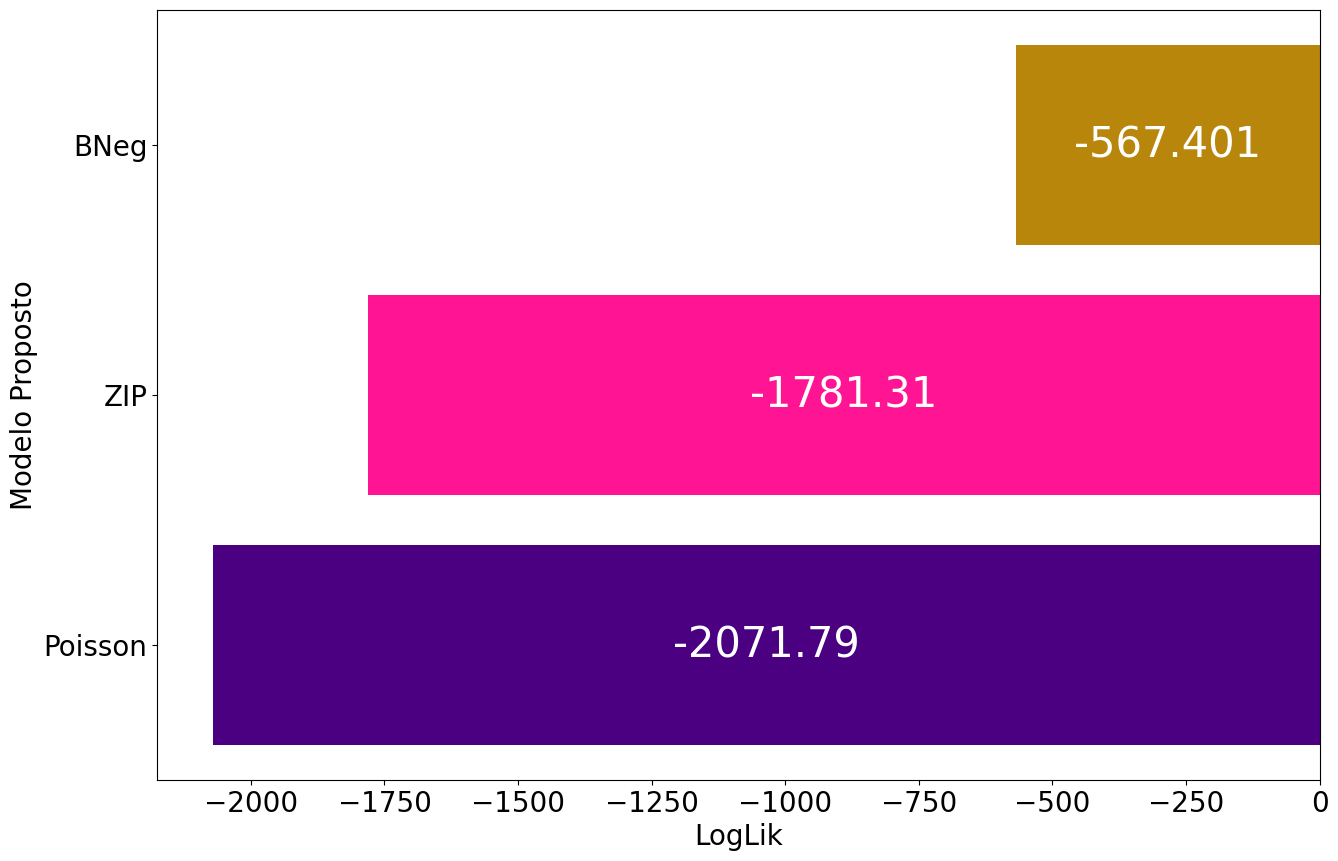

In [83]:
# Plotagem propriamente dita
fig, ax = plt.subplots(figsize=(15,10))

c = ['indigo', 'deeppink', 'darkgoldenrod']

ax1 = ax.barh(df_llf.modelo,df_llf.loglik, color = c)
ax.bar_label(ax1, label_type='center', color='white', fontsize=30)
ax.set_ylabel("Modelo Proposto", fontsize=20)
ax.set_xlabel("LogLik", fontsize=20)
ax.tick_params(axis='y', labelsize=20)
ax.tick_params(axis='x', labelsize=20)
plt.show()

# Regressão para Dados de Contagem - Modelo Zero Inflated tipo Binomial Negativa

In [87]:
# In[40]:
##############################################################################
#        ESTIMAÇÃO DO MODELO ZERO-INFLATED BINOMIAL NEGATIVO (ZINB)          #
##############################################################################

# Estimação do modelo ZINB pela função 'ZeroInflatedNegativeBinomialP' do pacote
#'statsmodels.discrete.count_model'

# Definição da variável dependente (voltando ao dataset 'df_corruption')
y = df_corruption['violations']

# Definição das variáveis preditoras que entrarão no componente de contagem
x1 = df_corruption[['staff','post','corruption']]
X1 = sm.add_constant(x1)

# Dummização da variável 'post'
# Se estimarmos o modelo sem dummizar as variáveis categóricas, o modelo retorna
#um erro
X1 = pd.get_dummies(X1, columns=['post'], dtype=int, drop_first=True)

# Definição das variáveis preditoras que entrarão no componente logit (inflate)
x2 = df_corruption[['corruption']]
X2 = sm.add_constant(x2)

# O argumento 'exog_infl' corresponde às variáveis que entram no componente
#logit (inflate)
modelo_zinb = ZeroInflatedNegativeBinomialP(y, X1, exog_infl=X2,
                                            inflation='logit').fit()

# Parâmetros do 'modelo_zinb'
modelo_zinb.summary()

# O parâmetro 'alpha' representa o 'fi' e é o inverso do parâmetro 'theta',
#ou seja, o inverso do parâmetro de forma da distribuição Poisson-Gama.
# Como 'alpha' (e da mesma forma 'theta') é estatisticamente diferente de
#zero, podemos afirmar que há superdispersão nos dados (outra forma de
#verificar o fenômeno da superdispersão!)

         Current function value: 1.870015
         Iterations: 35
         Function evaluations: 39
         Gradient evaluations: 39


<class 'statsmodels.iolib.summary.Summary'>
"""
                     ZeroInflatedNegativeBinomialP Regression Results                    
=========================================================================================
Dep. Variable:                        violations   No. Observations:                  298
Model:             ZeroInflatedNegativeBinomialP   Df Residuals:                      294
Method:                                      MLE   Df Model:                            3
Date:                           Sun, 29 Sep 2024   Pseudo R-squ.:                  0.1700
Time:                                   18:24:10   Log-Likelihood:                -557.26
converged:                                 False   LL-Null:                       -671.37
Covariance Type:                       nonrobust   LLR p-value:                 3.353e-49
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
inflate_const        -17.9857      9.287     -1.937      0.053     -36.187       0.216
inflate_corruption    -8.1104      4.037     -2.009      0.045     -16.023      -0.197
const                  2.0324      0.203      9.988      0.000       1.634       2.431
staff                  0.0411      0.013      3.078      0.002       0.015       0.067
corruption             0.1815      0.147      1.237      0.216      -0.106       0.469
post_yes              -4.2638      0.261    -16.328      0.000      -4.776      -3.752
alpha                  1.8560      0.218      8.518      0.000       1.429       2.283
======================================================================================
"""

Lembrando que como o parâmetro alpha (que é o parâmetro $\phi$ na função binomial negativa, que é o parâmetro de dispersão) é estatisticamente significativo, então o modelo apresenta superdispersão.

## Teste de Vuong para inflação de zeros

In [88]:
# In[41]: Teste de Vuong para verificação de existência de inflação de zeros
#no modelo ZINB, em comparação com o modelo binomial negativo

vuong_test(modelo_bneg, modelo_zinb)

# Ocorrência de inflação de zeros!

Optimization terminated successfully.
         Current function value: 6.952328
         Iterations 9
Vuong Non-Nested Hypothesis Test-Statistic (Raw):
Vuong z-statistic: -3.887
p-value: 0.000

==================Result======================== 

H1: Indicates inflation of zeros at 95% confidence level


## Comparação de modelos

In [89]:
# In[42]: Comparando os modelos BNeg e ZINB

summary_col([modelo_bneg, modelo_zinb], 
            model_names=["BNeg","ZINB"],
            stars=True,
            info_dict = {
                'N':lambda x: "{0:d}".format(int(x.nobs)),
                'Log-lik':lambda x: "{:.2f}".format(x.llf)
                })

,BNeg,ZINB
Intercept,1.9469***,
,(0.1616),
post[T.yes],-4.2746***,
,(0.2660),
staff,0.0400***,0.0411***
,(0.0089),(0.0133)
corruption,0.4527***,0.1815
,(0.1146),(0.1466)
inflate_const,,-17.9857*
,,(9.2867)


In [90]:
# In[43]: Teste de razão de verossimilhança para comparar as estimações dos
#'modelo_bneg' e 'modelo_zinb' (função 'lrtest' definida anteriormente)

lrtest([modelo_bneg, modelo_zinb])

Likelihood Ratio Test:
-2.(LL0-LLm): 20.27
p-value: 0.000

==================Result======================== 

H1: Different models, favoring the one with the highest Log-Likelihood


### Comparação entre as predições

In [93]:
# In[44]: COMPARAÇÕES ENTRE AS PREVISÕES:

# Supondo que considerássemos a estimação ZIP como a mais adequada, qual seria a 
#quantidade média esperada de violações de trânsito para um país cujo corpo 
#diplomático seja composto por 23 membros, considerando o período anterior à 
#vigência da lei e cujo índice de corrupção seja igual a 0.5?

# Modelo Poisson:

modelo_poisson.predict(pd.DataFrame({'staff':[23],
                                     'post':['no'],
                                     'corruption':[0.5]}))

0    17.93284
dtype: float64

In [124]:
# Modelo binomial negativo:

modelo_bneg.predict(pd.DataFrame({'staff':[28],
                                  'post':['yes'],
                                  'corruption':[1]}))

0    0.470211
dtype: float64

In [ ]:
# Modelo ZIP:
# Obs.: manter a ordem dos parâmetros nos argumentos da função 'predict'

modelo_zip.params

inflate_const        -1.611649
inflate_corruption   -0.952315
const                 2.488877
staff                 0.020020
corruption            0.093722
post_yes             -4.287916
dtype: float64

In [96]:
modelo_zinb.predict(pd.DataFrame({'const':[1],
                                  'staff':[23],
                                  'corruption':[0.5],
                                  'post_yes':[0]}),
                    exog_infl=pd.DataFrame({'const':[1],
                                            'corruption':[0.5]}))

0    21.495939
dtype: float64

In [99]:
# In[46]: Adicionando os fitted values dos modelos estimados para fins de   
#comparação

df_corruption['fitted_zip'] = modelo_zip.predict(X1, exog_infl=X2)
df_corruption['fitted_zinb'] = modelo_zinb.predict(X1, exog_infl=X2)

df_corruption[['violations','fitted_poisson','fitted_bneg',
               'fitted_zip','fitted_zinb']]

,violations,fitted_poisson,fitted_bneg,fitted_zip,fitted_zinb
0,50,15.919915,16.138592,14.823562,13.358543
1,1,0.216711,0.224603,0.203580,0.187939
2,17,13.371720,11.987630,12.877979,10.203814
3,0,0.182023,0.166834,0.176860,0.143555
4,0,7.477915,5.551770,8.379367,7.494531
...,...,...,...,...,...
293,0,0.243691,0.253810,0.207250,0.183098
294,37,13.486751,12.955688,13.616058,12.232444
295,0,0.183589,0.180306,0.186996,0.172096
296,43,12.994217,13.033499,13.732195,13.896783


<function matplotlib.pyplot.show(close=None, block=None)>

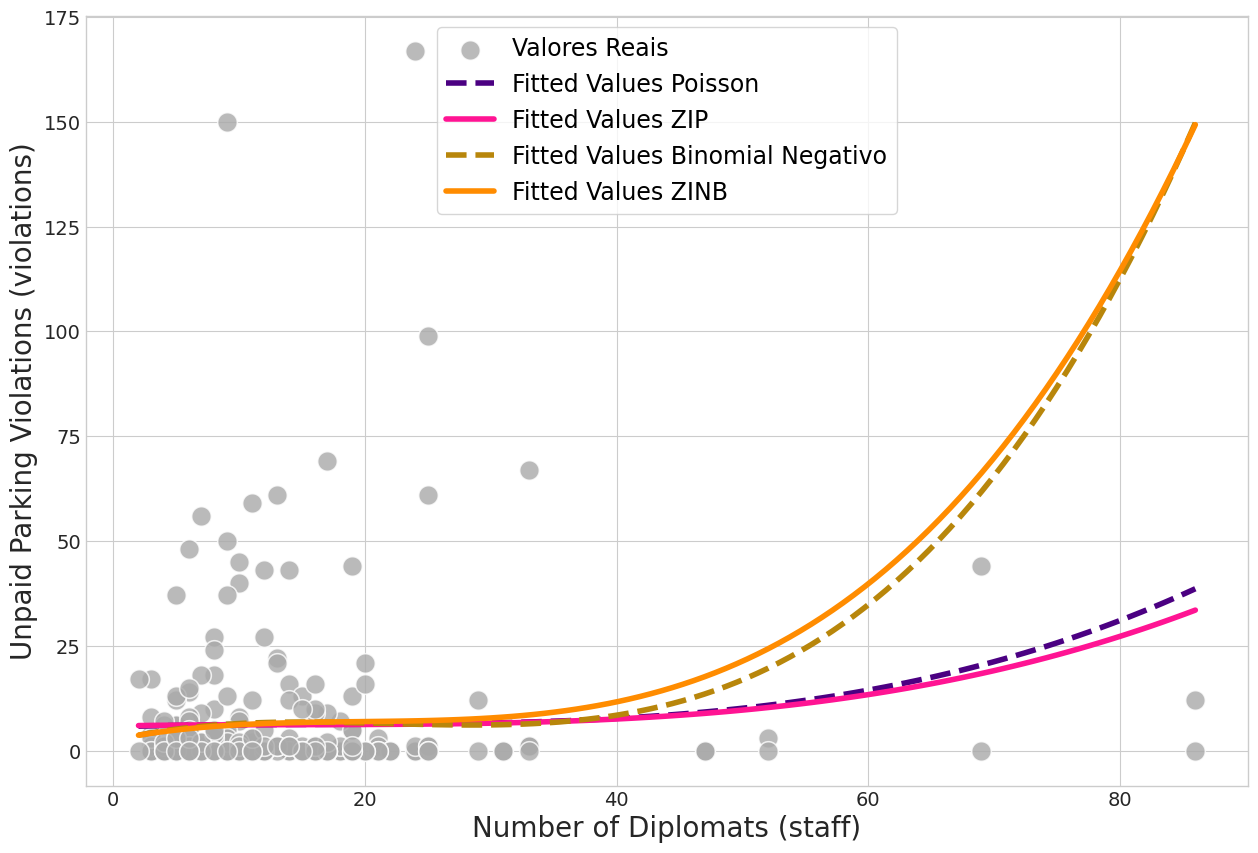

In [100]:
# In[47]: Fitted values dos modelos Poisson, BNeg, ZIP e ZINB, considerando,
#para fins didáticos, a variável dependente 'violations' em função apenas da
#variável preditora 'staff'

plt.figure(figsize=(15,10))
with plt.style.context('seaborn-v0_8-whitegrid'):
    sns.scatterplot(x='staff', y='violations', data=df_corruption, color='darkgrey',
                s=200, label='Valores Reais', alpha=0.8)
    sns.regplot(data=df_corruption, x='staff', y='fitted_poisson', order=3, ci=False,
            scatter=False, color='indigo',
            label='Fitted Values Poisson',
            line_kws={'linewidth': 4, 'linestyle': 'dashed'})
    sns.regplot(data=df_corruption, x='staff', y='fitted_zip', order=3, ci=False,
            scatter = False, color='deeppink',
            label='Fitted Values ZIP',
            line_kws={'linewidth': 4})
    sns.regplot(data=df_corruption, x='staff', y='fitted_bneg', order=3, ci=False,
            scatter = False, color='darkgoldenrod',
            label='Fitted Values Binomial Negativo',
            line_kws={'linewidth': 4, 'linestyle': 'dashed'})
    sns.regplot(data=df_corruption, x='staff', y='fitted_zinb', order=3, ci=False,
            scatter=False, color='darkorange',
            label='Fitted Values ZINB',
            line_kws={'linewidth': 4})
plt.xlabel('Number of Diplomats (staff)', fontsize=20)
plt.ylabel('Unpaid Parking Violations (violations)', fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='upper center', fontsize=17)
plt.show

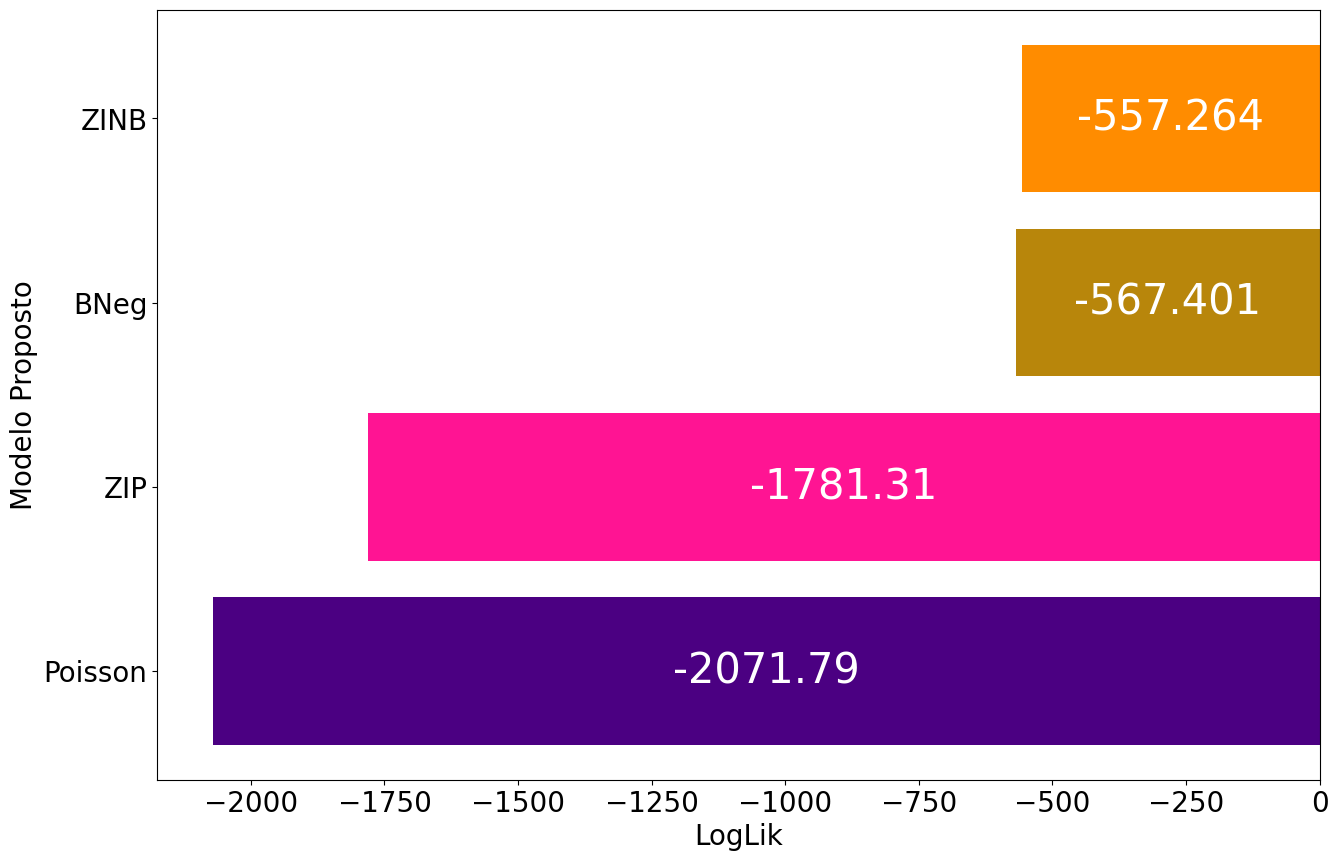

In [101]:
# In[48]: Gráfico para a comparação dos LogLiks dos modelos Poisson,
#binomial negativo, ZIP e ZINB

# Definição do dataframe com os modelos e respectivos LogLiks
df_llf = pd.DataFrame({'modelo':['Poisson','ZIP','BNeg','ZINB'],
                      'loglik':[modelo_poisson.llf,
                                modelo_zip.llf,
                                modelo_bneg.llf,
                                modelo_zinb.llf]})
df_llf

# Plotagem propriamente dita
fig, ax = plt.subplots(figsize=(15,10))

c = ['indigo', 'deeppink', 'darkgoldenrod', 'darkorange']

ax1 = ax.barh(df_llf.modelo,df_llf.loglik, color = c)
ax.bar_label(ax1, label_type='center', color='white', fontsize=30)
ax.set_ylabel("Modelo Proposto", fontsize=20)
ax.set_xlabel("LogLik", fontsize=20)
ax.tick_params(axis='y', labelsize=20)
ax.tick_params(axis='x', labelsize=20)
plt.show()

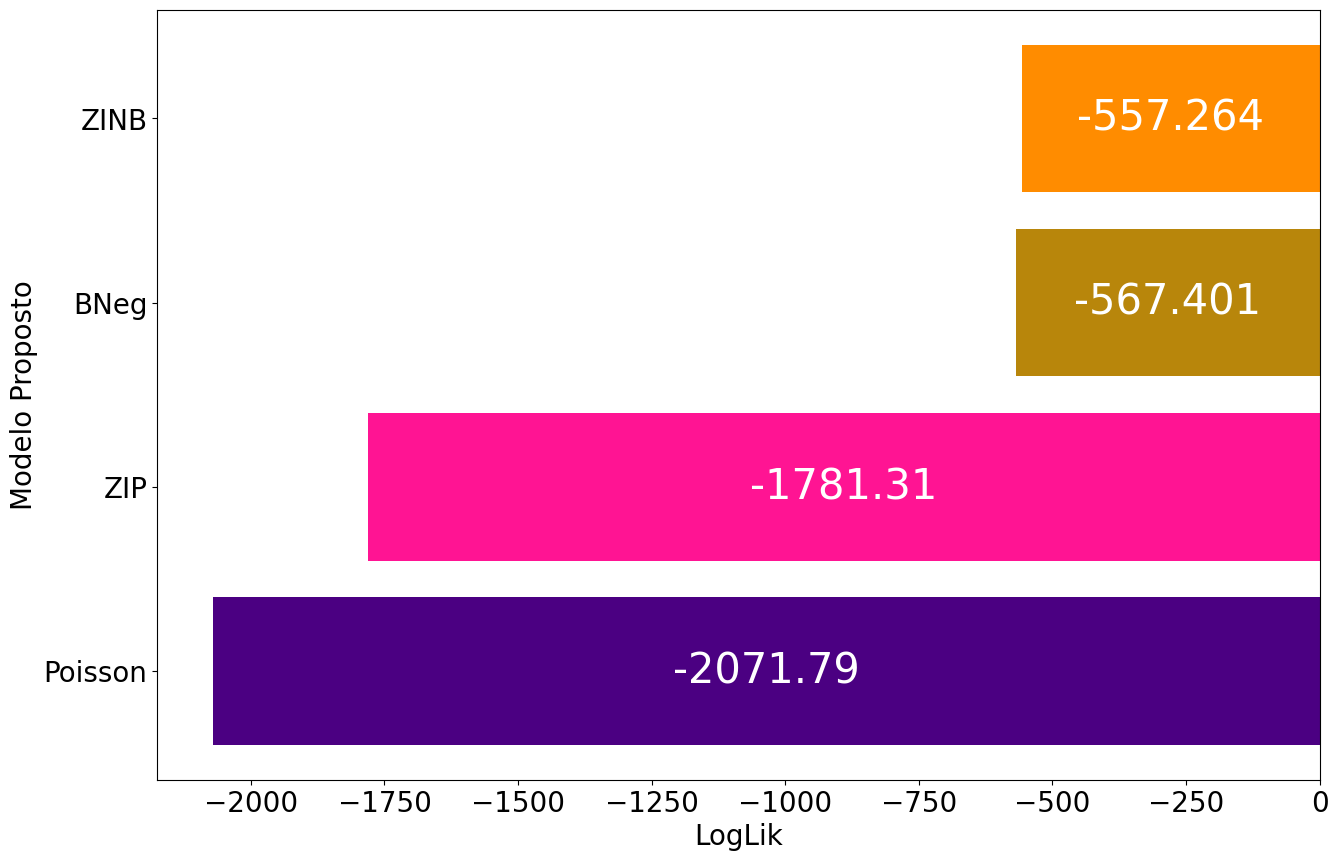

In [104]:
# In[49]: Gráfico para a comparação dos LogLiks dos modelos Poisson,
#binomial negativo, ZIP e ZINB, com JPG e som para fins didáticos

import urllib.request
from PIL import Image

# Define a URL da imagem
url = "https://i.pinimg.com/originals/4a/ac/99/4aac9978c444c55cd462fd92c8ac400e.png"

# Carrega a imagem da URL
imagem = Image.open(urllib.request.urlopen(url))

# Define as dimensões e a posição desejada da imagem
nova_largura = 1700  # Largura da imagem redimensionada
nova_altura = 1700   # Altura da imagem redimensionada
posicao_x = 5500       # Posição horizontal da imagem
posicao_y = 4300       # Posição vertical da imagem

# Redimensiona a imagem
imagem_redimensionada = imagem.resize((nova_largura, nova_altura))

# Definição do dataframe com os modelos e respectivos LogLiks
df_llf = pd.DataFrame({'modelo':['Poisson','ZIP','BNeg','ZINB'],
                      'loglik':[modelo_poisson.llf,
                                modelo_zip.llf,
                                modelo_bneg.llf,
                                modelo_zinb.llf]})
df_llf

# Plotagem propriamente dita
fig, ax = plt.subplots(figsize=(15,10))

c = ['indigo', 'deeppink', 'darkgoldenrod', 'darkorange']

ax1 = ax.barh(df_llf.modelo,df_llf.loglik, color = c)
ax.bar_label(ax1, label_type='center', color='white', fontsize=30)
ax.set_ylabel("Modelo Proposto", fontsize=20)
ax.set_xlabel("LogLik", fontsize=20)
ax.tick_params(axis='y', labelsize=20)
ax.tick_params(axis='x', labelsize=20)

# Adiciona a imagem redimensionada em uma posição específica do gráfico
plt.figimage(imagem_redimensionada, posicao_x, posicao_y, zorder=1, alpha=0.73)

# Exibe o gráfico com a imagem
plt.show()

from playsound import playsound

# Reproduz um som padrão (arquivo na pasta do curso)
playsound('D:\Estudos\MBA USP ESALQ - Data Science\Machine Learning\Supervised Machine Learning\Modelos para dados de contagem\sound.mp3')


# Resumo e conclusões

Os modelos de regressão de Poisson e Binomial Negativo fazem parte do que é conhecido por modelos de regressão para dados de contagem, e têm por objetivo analisar o comportamento, em função de variáveis preditoras, de determinada variável dependente que se apresenta na forma quantitativa.

---

Um dado de contagem possui 4 características:

1. São dados quantitativos
2. Inteiros
3. Não negativos
4. Determinados por uma exposição (*e.g.* Quantidade de filhos por família, carros passando por unidade de tempo, formigas passando na trilha por minuto.)

---

Os modelos OLS não são tão bons para contagem, apesar de serem quantitativos, quanto os modelos utilizando as *f.d.p.* binomial negativa e poisson.

---

**Superdispersão**

Num histograma, o formato do gráfico pode indicar uma cauda muito longa, indicando que os dados estão muito dispersos.

Quando não há superdispersão, não há diferença significante entre Poisson e Binomial Negativa

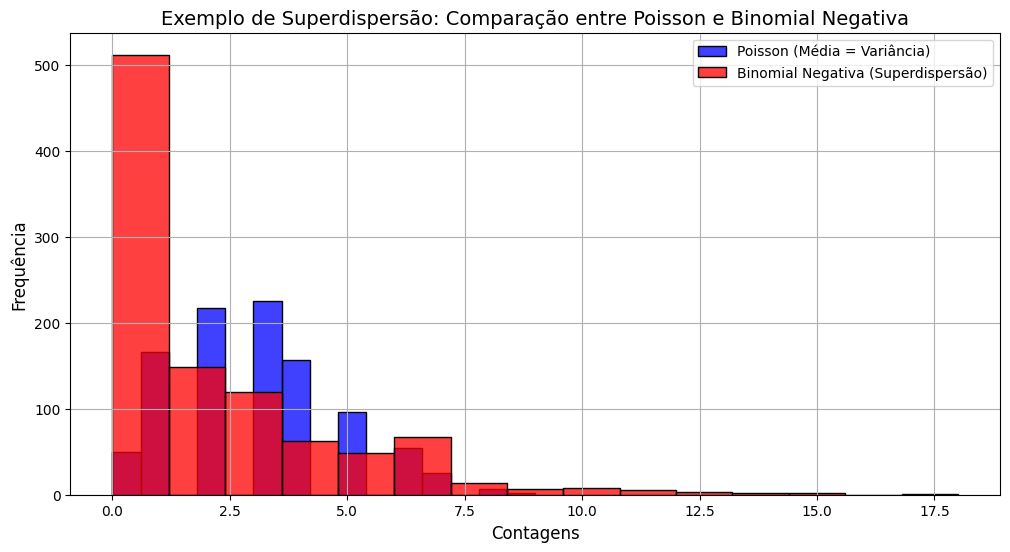

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Gerando dados simulados
np.random.seed(42)

# Dados de contagem com média e variância iguais (distribuição Poisson)
data_poisson = np.random.poisson(lam=3, size=1000)

# Dados de contagem com superdispersão (Binomial Negativa)
n, p = 1, 0.3  # Parâmetros da binomial negativa
data_binom_neg = np.random.negative_binomial(n, p, size=1000)

# Criando o gráfico
plt.figure(figsize=(12, 6))

# Distribuição de Poisson
sns.histplot(data_poisson, color="blue", kde=False, label="Poisson (Média = Variância)", bins=15)

# Distribuição Binomial Negativa (Superdispersão)
sns.histplot(data_binom_neg, color="red", kde=False, label="Binomial Negativa (Superdispersão)", bins=15)

# Customizando o gráfico
plt.title("Exemplo de Superdispersão: Comparação entre Poisson e Binomial Negativa", fontsize=14)
plt.xlabel("Contagens", fontsize=12)
plt.ylabel("Frequência", fontsize=12)
plt.legend()
plt.grid(True)
plt.show()


---

Caso 

* $Var(X) \approx \text{média}$ estamos lidando com a distribuição Poisson
* $Var(X) \gg {média}$ estamos lidando com a binomial negativa

---

In [ ]:
from tabulate import tabulate
tabela = tabulate(table, headers='keys', tablefmt='grid', numalign='center')


---

Colocar a fórmula do LogLik no TCC

---

Função alternativa para estimação do modelo da aula no capítulo 2.

In [51]:
modelo_poisson_alt = sm.Poisson.from_formula('violations ~ staff + post + corruption', df_corruption).fit()
modelo_poisson_alt.summary()

Optimization terminated successfully.
         Current function value: 6.952328
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Poisson Regression Results                          
==============================================================================
Dep. Variable:             violations   No. Observations:                  298
Model:                        Poisson   Df Residuals:                      294
Method:                           MLE   Df Model:                            3
Date:                Sun, 22 Sep 2024   Pseudo R-squ.:                  0.3992
Time:                        22:15:25   Log-Likelihood:                -2071.8
converged:                       True   LL-Null:                       -3448.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       2.2127      0.031     71.134      0.000       2.152       2.274
post[T.yes]    -4.2968      0.197    -21.762      0.000      -4.684      -3.910
staff           0.0219      0.001     17.807      0.000       0.019       0.024
corruption      0.3418      0.027     12.430      0.000       0.288       0.396
===============================================================================
"""

In [ ]:
from statstests.tests import overdisp

# Elaboração direta do teste de superdispersão
overdisp(modelo_poisson, df_corruption)

Poderíamos ter colocado também

```python
from statstests.tests import overdisp

# Elaboração direta do teste de superdispersão
overdisp('violations ~ staff + post + corruption', df_corruption)
```

---

Poisson gama é a função Binomial Negativa. Essa distribuição é utilizada em modelos de contagem com superdispersão (cauda longa). Caso a cauda não seja longa, podemos utilizar a função Poisson.

\begin{equation}
p(Y_i = m) = \dfrac{\delta^\theta.m_i^{\theta-1}.e^{-m_i . \delta}}{(\theta - 1)!}
\end{equation}

$\theta$ é o parâmetro de forma
$\gamma$ taxa de decaimento, determina o quão rápido o histograma "cai"

Estamos estimando o modelo de binomial negativa tipo 2 pois colocamos o quadrado na média na fórmula da variância

\begin{equation}
Var(Y) = \lambda_{bneg} + \phi.(\lambda_{bneg})^2
\end{equation}

Se $\phi = 0$ então a variância é igual à média e portanto a distribuição é a Poisson
Se $\phi neq 0$ então estamos lidando com a distribuição binomial negativa

---

Modelo Zero Inflated: A característica principal desse modelo é a grande quantidade de contagens iguais à zeros. Utilizado para modelar eventos raros.

---

Ausência de superdispersão é análogo a verificar a significância estatística do parâmetro `alpha` ($\phi$) do summary do python

---

Não há processo de stepwise para o modelo zero inflated, mas há stepwise para o logit.

## Escolha do modelo

\begin{array}{|c|c|c|c|c|}
\hline
Verificação & \text{Poisson} & \text{Binomial Negativa} & \text{Poisson Inflacionado de Zeros (ZIP)} & \text{Binomial Negativa Inflacionada de Zeros (ZINB)} \\
\hline
\text{Superdispersão nos dados da variável dependente} & \text{não} & \text{sim} & \text{não} & \text{sim} \\
\hline
\text{Quantidade excessiva de zeros na variável dependente} & \text{não} & \text{não} & \text{sim} & \text{sim} \\
\hline
\end{array}



## Dicas do TCC

Colocar a fórmula do LogLik no TCC

## Modelo linear x Poisson x Binomial Negativa

In [111]:
modelo_linear = sm.OLS.from_formula('violations ~ staff + post + corruption', df_corruption).fit()
modelo_linear.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             violations   R-squared:                       0.150
Model:                            OLS   Adj. R-squared:                  0.142
Method:                 Least Squares   F-statistic:                     17.34
Date:                Sun, 29 Sep 2024   Prob (F-statistic):           2.15e-10
Time:                        20:40:31   Log-Likelihood:                -1262.9
No. Observations:                 298   AIC:                             2534.
Df Residuals:                     294   BIC:                             2549.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       9.7926      1.756      5.577      0.000       6.337      13.248
post[T.yes]   -12.6443      1.955     -6.469      0.000     -16.491      -8.797
staff           0.2538      0.091      2.775      0.006       0.074       0.434
corruption      2.2367      1.001      2.235      0.026       0.267       4.206
==============================================================================
Omnibus:                      355.094   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            20158.543
Skew:                           5.312   Prob(JB):                         0.00
Kurtosis:                      41.867   Cond. No.                         38.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [112]:
from statstests.tests import shapiro_francia

shapiro_francia(modelo_linear.resid)

method  :  Shapiro-Francia normality test
statistics W  :  0.5296850169142768
statistics z  :  9.933336529205448
p-value  :  1.4905497310055174e-23


{'method': 'Shapiro-Francia normality test',
 'statistics W': 0.5296850169142768,
 'statistics z': 9.933336529205448,
 'p-value': 1.4905497310055174e-23}

O teste deu estatísticamente significativo, portanto o modelo não é aderente à normalidade, com isso devemos aplicar uma transformação de Box-Cox.

In [116]:
# Transformação de Box-Cox na variável 'violations'
from scipy.stats import boxcox

df_corruption['violations'].describe()

count    298.000000
mean       6.496644
std       18.210377
min        0.000000
25%        0.000000
50%        0.000000
75%        3.000000
max      167.000000
Name: violations, dtype: float64

In [117]:
df_corruption['violations1'] = df_corruption['violations'] + 0.001

In [119]:
df_corruption['violations1'].describe()

count    298.000000
mean       6.497644
std       18.210377
min        0.001000
25%        0.001000
50%        0.001000
75%        3.001000
max      167.001000
Name: violations1, dtype: float64

In [120]:
yast, lmbda = boxcox(df_corruption['violations1'])

df_corruption['bc_violations'] = yast

In [121]:
df_corruption

,country,code,violations,staff,post,corruption,lambda_poisson,ystar,fitted_poisson,fitted_bneg,fitted_zip,fitted_zinb,violations1,bc_violations
0,Angola,AGO,50,9,no,1.047506,15.919915,69.815208,15.919915,16.138592,14.823562,13.358543,50.001,3.463074
1,Angola,AGO,1,9,yes,1.047506,0.216711,-1.783289,0.216711,0.224603,0.203580,0.187939,1.001,0.000999
2,Albania,ALB,17,3,no,0.921079,13.371720,-0.286843,13.371720,11.987630,12.877979,10.203814,17.001,2.592518
3,Albania,ALB,0,3,yes,0.921079,0.182023,0.182023,0.182023,0.166834,0.176860,0.143555,0.001,-8.675434
4,United Arab Emirates,ARE,0,3,no,-0.779468,7.477915,7.477915,7.477915,5.551770,8.379367,7.494531,0.001,-8.675434
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293,Zaire,ZAR,0,6,yes,1.582807,0.243691,0.243691,0.243691,0.253810,0.207250,0.183098,0.001,-8.675434
294,Zambia,ZMB,37,9,no,0.562193,13.486751,38.250347,13.486751,12.955688,13.616058,12.232444,37.001,3.226073
295,Zambia,ZMB,0,9,yes,0.562193,0.183589,0.183589,0.183589,0.180306,0.186996,0.172096,0.001,-8.675434
296,Zimbabwe,ZWE,43,14,no,0.133379,12.994217,65.979120,12.994217,13.033499,13.732195,13.896783,43.001,3.344928


In [122]:
# Estimar o novo modelo OLS com a trasnformação de Box-Cox

modelo_bc = sm.OLS.from_formula('bc_violations ~ staff + post + corruption',
                                    df_corruption).fit()

modelo_bc.summary()
modelo_bc.llf

shapiro_francia(modelo_bc.resid)

# In[FINAL]: Gráfico para a comparação dos LogLiks dos modelos Poisson,
#binomial negativo, ZIP, ZINB, OLS e OLS com Box-Cox

# Definição do dataframe com os modelos e respectivos LogLiks
df_llf = pd.DataFrame({'modelo':['Poisson','ZIP','BNeg','ZINB',
                                 'OLS Linear','OLS Box-Cox'],
                      'loglik':[modelo_poisson.llf,
                                modelo_zip.llf,
                                modelo_bneg.llf,
                                modelo_zinb.llf,
                                modelo_linear.llf,
                                modelo_bc.llf]})
df_llf

method  :  Shapiro-Francia normality test
statistics W  :  0.963595619898319
statistics z  :  4.5041310129855265
p-value  :  3.332254207876352e-06


,modelo,loglik
0,Poisson,-2071.793753
1,ZIP,-1781.308425
2,BNeg,-567.401172
3,ZINB,-557.264368
4,OLS Linear,-1262.860740
5,OLS Box-Cox,-803.491282


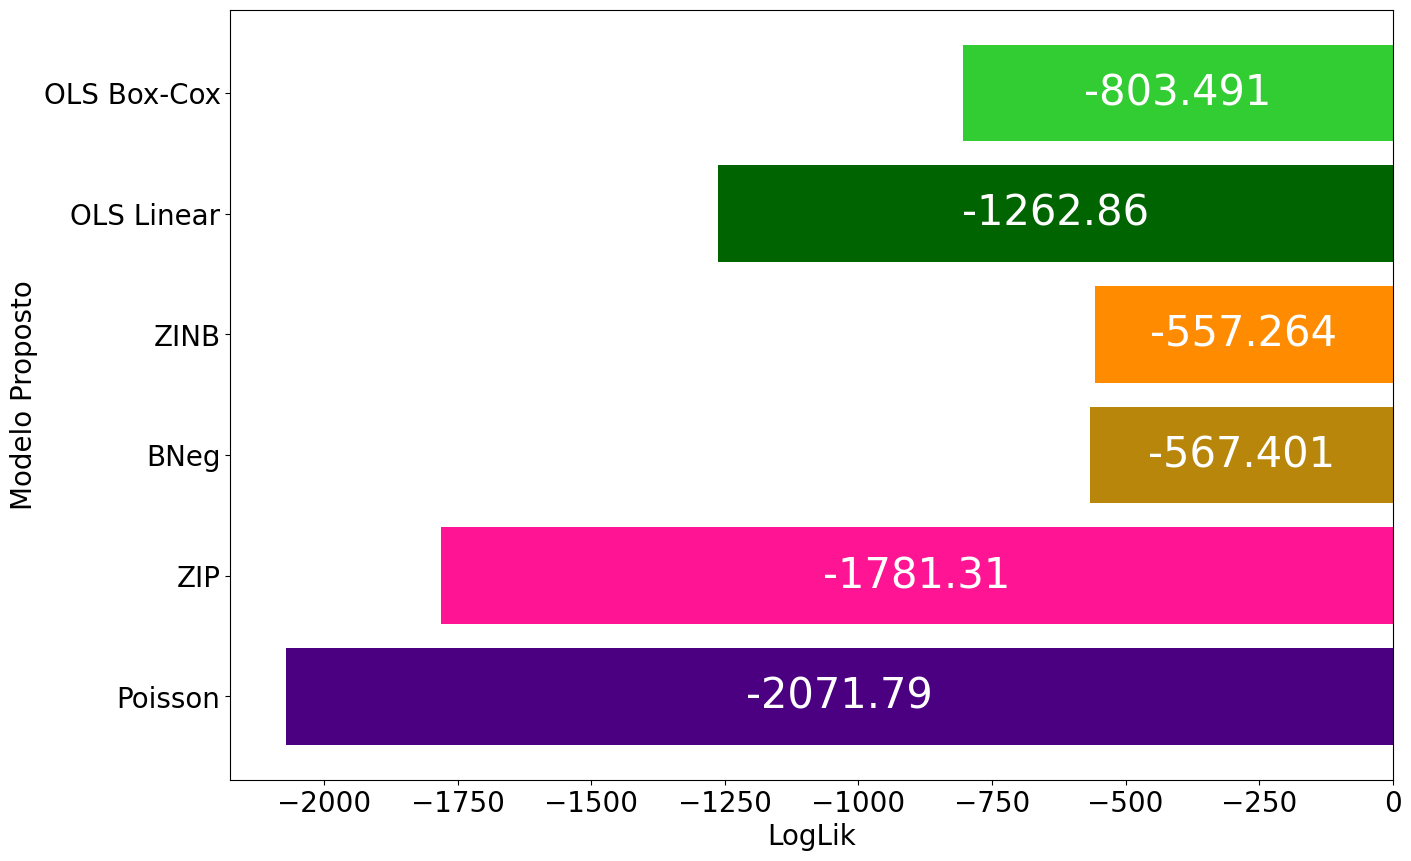

In [123]:
# Plotagem propriamente dita
fig, ax = plt.subplots(figsize=(15,10))

c = ['indigo', 'deeppink', 'darkgoldenrod', 'darkorange',
     'darkgreen','limegreen']

ax1 = ax.barh(df_llf.modelo,df_llf.loglik, color = c)
ax.bar_label(ax1, label_type='center', color='white', fontsize=30)
ax.set_ylabel("Modelo Proposto", fontsize=20)
ax.set_xlabel("LogLik", fontsize=20)
ax.tick_params(axis='y', labelsize=20)
ax.tick_params(axis='x', labelsize=20)
plt.show()

In [126]:
np.exp(1.9469 - 4.2746*0 + 0.04*28 + 0.4527*1)

33.770917394857975